> **Goal**
   - The goal of this project is to conduct *Exploratory Data Analysis (EDA)* to understand the underlying patterns and factors influencing loan default among applicants in a consumer finance company. By analyzing historical loan data, the objective is to identify key insights and correlations between consumer attributes, loan attributes, and the likelihood of default.

> **Problem Statement**
   - The consumer finance company specializes in lending various types of loans to urban customers. However, two types of risks are associated with the bank's decision-making process: approving a loan to an applicant who is likely to default and rejecting a loan to an applicant who would have otherwise repaid the loan. The challenge is to explore the data and uncover actionable insights that can help the company make informed decisions during the loan approval process to minimize financial losses due to defaults while maximizing business opportunities.
   
> **Target**
   - The target of this project is to perform a comprehensive exploratory analysis of the loan data to understand the underlying trends, patterns, and relationships between different variables and loan default. By examining the historical loan data, the objective is to identify potential risk factors and drivers associated with loan default, providing valuable insights to guide decision-making processes within the company.
  
> **Risk associated with the problem**
   - Financial Loss due to Defaults: The primary risk is the financial loss incurred when borrowers default. Understanding default patterns helps minimize credit losses.
   - Loss of Business Opportunity: Inadequate understanding of default patterns may lead to missed opportunities. EDA helps optimize lending strategies to maximize profitability.


In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

In [2]:
#reading the data
loan_data = pd.read_csv('loan.csv')

### 1. Data Cleaning

#### 1.1 To check for the presence of headers, footers, or summary details rows and remove them from the data if present

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


> *We can see that there are no headers or summary rows present in the above dataframe*

In [4]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> *From the above output we can say that there is no footers, Total, Subtotal rows present either.*

In [5]:
loan_data.shape

(39717, 111)

> Number of rows is 39717, and columns is 111.

#### 1.2 Removing unnecessary columns from the dataset

##### Null Values

In [6]:
# Checking null percentage for each column
null_percentage = loan_data.isnull().mean() * 100

In [7]:
# Printing null percentage for each column
print("Null percentage for each column:")
print(null_percentage)

Null percentage for each column:
id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [8]:
# Drop rows with missing values; here we have set threshold as 50. 
# i.e. Drop those column where null vlues are more than the 50%

threshold = 50 
columns_to_drop = null_percentage[null_percentage > threshold].index
print(columns_to_drop)
loan_data.drop(columns_to_drop, axis=1, inplace=True)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
loan_data.shape

(39717, 54)

##### Unique values

In [10]:
# Finding columns with only one unique value
single_value_columns = loan_data.loc[:,loan_data.nunique() == 1].columns
print(single_value_columns)
print('Count of these types of columns are {}'.format(len(single_value_columns)))

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
Count of these types of columns are 9


> The below code returns the number of unique values in each column of the loan_data DataFrame and sorts them in ascending order. It provides a quick overview of the diversity of values present in each column

In [11]:

print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [12]:
# Dropping the single_value_columns which are 9
loan_data.drop(single_value_columns, axis=1, inplace=True)

In [13]:
#checking the shape again
loan_data.shape

(39717, 45)

In [14]:
#This code snippet identifies and prints the columns in the loan_data DataFrame that contain unique values for each row, 
# meaning every value in the column is different.
all_unique_columns = loan_data.loc[:,loan_data.nunique() == len(loan_data)].columns
print(all_unique_columns)
print('Count of these types of columns are {}'.format(len(all_unique_columns)))

Index(['id', 'member_id', 'url'], dtype='object')
Count of these types of columns are 3


In [15]:
# Dropping all_unique_columns, which are 3
loan_data.drop(all_unique_columns, axis=1, inplace=True)

In [16]:
# checking the shape again
loan_data.shape

(39717, 42)

> After dropping 12 columns avaialble number of columns -> 42

> **In preparation for our ultimate goal of identifying potential loan defaults, we are filtering out rows where the loan_status column indicates anything other than fully paid or charged off loans. This allows us to focus our analysis on the relevant data points that directly contribute to understanding loan default behavior.**

In [17]:
# Checking Loan Status and their counts
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [18]:
# percentage wise distribution
loan_data['loan_status'].value_counts()*100/len(loan_data)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [19]:
# As per the providied statement above we don't get any conclusive data from the Current loan status accounts;
# so we can drop these rows
loan_data = loan_data[loan_data['loan_status']!='Current']

In [20]:
print("Total number of rows after deleting Current loan status rows:",len(loan_data)) ## Total no of rows now.

Total number of rows after deleting Current loan status rows: 38577


##### Duplicate values

In [21]:
#checking if we have any duplicate rows
num_duplicates = loan_data.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


> No rows are duplicate so nothing to delete here

In [22]:
# Data shape till now
loan_data.shape

(38577, 42)

### Deleting the Uneccessasry Columns

> After thorough analysis, it is observed that these columns are not relevant to our objectives and can be dropped.

> **desc** and **title** Columns are not holding any information which could be required for the analysis
>
> **emp_title:** The job title supplied by the borrower not directly relevant to the analysis it can be dropped.
>
> **zip_code:** While it provides geographical information, the first three digits of the zip code might not be sufficiently granular for meaningful analysis unless geographical segmentation is a key aspect of the analysis. If not, it can be dropped.
>
>**earliest_cr_line:** The month the borrower's earliest reported credit line was opened is not directly relevant to, it can be dropped.
>
> **last_credit_pull_d:** The specific timing of the last credit pull is not critical for the analysis, this column can be dropped


In [23]:
# Deleting desc/title as they are not relevant for the analysis
loan_data.drop(columns=['desc','title'],inplace=True)
loan_data.shape

(38577, 40)

In [24]:
# Deleting aforementioned columns
columns_to_drop = ['emp_title', 'zip_code', 'earliest_cr_line', 'last_credit_pull_d']

# Dropping the columns
loan_data = loan_data.drop(columns=columns_to_drop)

In [25]:
loan_data.shape

(38577, 36)

## Further analysis to Delete the columns as per final objective

**We can safely drop columns that pertain to post-approval stages of a loan, as they are irrelevant to our current analysis focused on loan approval and potential default. This streamlines our dataset, allowing us to concentrate on the most pertinent factors.**
- We've streamlined the loan_data dataframe by dropping columns that we deemed less relevant for predicting loan default at the time of application approval. These excluded columns encompass various payment-related metrics such as total payments received, principal, interest, late fees, recoveries, and collection fees. Additionally, we've omitted features related to past delinquency history, charge-offs, public records, and months since the last delinquency or record.
- Our rationale behind this decision is to prioritize the inclusion of variables that serve as strong indicators of loan default, aligning with the company's objective of enhancing its understanding of the driving factors behind loan default before approving loans. By focusing on the most pertinent features, we aim to optimize the accuracy and efficiency of our loan approval process.This is a blockquote.

> **delinq_2yrs:** The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. This information might not be as relevant for predicting loan default compared to other factors.
>
> **out_prncp:** Remaining outstanding principal for total amount funded. Since this information pertains to the remaining principal balance, it might not contribute significantly to predicting loan default.
>
> **total_pymnt:** Total payments received to date for the total amount funded. This column represents the total payments received, which might not be relevant for predicting loan default at the time of application approval.
>
> **total_rec_prncp:** Principal received to date. Similar to total_pymnt, this column represents historical data on payments received and may not be relevant for predicting loan default upfront.
>
> **total_rec_int:** Interest received to date. While interest payments are important for loan performance, they might not strongly indicate loan default at the time of application approval.
>
> **total_rec_late_fee:** Late fees received to date. This column represents late fee payments, which might not be as significant for predicting loan default compared to other factors.
>
> **recoveries:** Post charge-off gross recovery. This information pertains to post-charge-off recovery and may not be relevant for predicting loan default upfront.
>
> **collection_recovery_fee:** This column represents post-charge-off collection fees and might not be relevant for predicting loan default at the time of application approval.
>
> **last_pymnt_d:** Last month payment was received. Since this column represents historical data on payment dates, it might not be relevant for predicting loan default upfront.
>
> **last_pymnt_amnt:** Last total payment amount received. Similar to last_pymnt_d, this column represents historical payment data and may not strongly indicate loan default at the time of application approval.
>
> since **"funded_amnt_inv"** already provides information about the actual amount funded by investors, **"funded_amnt"** becomes redundant and can be removed from the dataset.

In [26]:
# deleting the aforementioned columns
columns_to_drop = [
    'delinq_2yrs',
    'out_prncp',
    'total_pymnt',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'funded_amnt',
    'out_prncp_inv', 
    'total_pymnt_inv'
]
loan_data.drop(columns=columns_to_drop, inplace=True)

In [27]:
loan_data.shape

(38577, 23)

In [28]:
#available columns now
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

##### Missing values

In [29]:
#checking the missing values
missing_percentages = (loan_data.isnull().mean() * 100).round(2)

# Display columns with missing values and their respective percentages
print("Columns with missing values (in percentage):")
print(missing_percentages[missing_percentages > 0])

Columns with missing values (in percentage):
emp_length              2.68
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64


In [30]:
# Fill missing values in emp_length with the mode value
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)

> **Revol_util:** This column represents the borrower's revolving credit utilization. Since it's a numeric variable, we could fill missing values with the mean or median of the column. First we have to convert it to numeric form.
>
> **Pub_rec_bankruptcies:** This column indicates the number of public record bankruptcies. Since it's a numeric variable with discrete values, we could fill missing values with the mode (most common value) of the column. 


In [31]:
# Fill missing values in revol_util with the mean

# First Convert 'revol_util' to float
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype(float)

# Calculate the mean of non-missing values in revol_util
mean_revol_util = loan_data['revol_util'].dropna().mean()

# Fill the missing values in revol_util with the mean
loan_data['revol_util'].fillna(mean_revol_util, inplace=True)

In [32]:
# Fill missing values in pub_rec_bankruptcies with the mode
loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [33]:
# Check missing values once agian
missing_percentages = (loan_data.isnull().mean() * 100).round(2)

# Display columns with missing values and their respective percentages
print("Columns with missing values (in percentage):")
print(missing_percentages[missing_percentages > 0])

Columns with missing values (in percentage):
Series([], dtype: float64)


> We don't have any missing values now

### 2. Data Conversion

In [34]:
#displays the data types of each column in the loan_data DataFrame
loan_data.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

> Converting **'term'** to int dtype

In [35]:
# Firstly, calculate the count of unique values in the 'term' column of the loan_data DataFrame.
loan_data['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [36]:
# Converting 'term' column to int
loan_data['term'] = pd.to_numeric(loan_data['term'].apply(lambda x:x.strip().split()[0]))

In [37]:
#verifying term dtype again
loan_data['term'].dtype

dtype('int64')

> Converting '**int_rate**' to float dtype 

In [38]:
#first checking the frequency count of unique values in the 'int_rate' column
loan_data['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [39]:
# Converting 'int_rate' to float
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))

In [40]:
#verifying int_rate dtype again
loan_data['int_rate'].dtype

dtype('float64')

In [41]:
loan_data.head(3)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,AZ,27.65,1,3,0,13648,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,car,GA,1.00,5,3,0,1687,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,IL,8.72,2,2,0,2956,98.5,10,0.0


> This loop iterates through a list of column names **'funded_amnt_inv', 'int_rate', 'dti'** in the loan_data DataFrame. For each column, it rounds the values to two decimal places using a lambda function and then prints the updated column.

In [42]:
# Rounding off the belows to two decimals points.
for col in ['funded_amnt_inv', 'int_rate', 'dti']:
    loan_data[col] = loan_data[col].apply(lambda x: round(x,2))
    print(loan_data[col])

0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64


> Converting '**emp_length**' to int dtype

> The below function, **fix_emp_length_values**, is designed to clean and standardize the values in the 'emp_length' column of the loan_data DataFrame. It removes any occurrences of the string "years" and "<", as well as any spaces and "+" characters. This cleaning process ensures that the 'emp_length' values are consistent and formatted properly for further analysis. The apply() function is used to apply this cleaning function to each value in the 'emp_length' column, modifying the column in place.

In [43]:
def fix_emp_length_values(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_data['emp_length']=loan_data['emp_length'].apply(lambda x : fix_emp_length_values(x) )

In [44]:
loan_data.head(5)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,1,3,0,13648,83.7,9,0.0
1,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,...,car,GA,1.00,5,3,0,1687,9.4,4,0.0
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,2,2,0,2956,98.5,10,0.0
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,other,CA,20.00,1,10,0,5598,21.0,37,0.0
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,3,9,0,7963,28.3,12,0.0


In [45]:
# checking emp_length dtype
loan_data['emp_length'].dtype

dtype('O')

In [46]:
# Converting 'emp_length' to int
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])
loan_data['emp_length'].dtype

dtype('int64')

> Converting '**issue_d**' to date type

In [47]:
#converting issue_d`to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

### 3. Derived Columns

In [48]:
# Creating a dervied columns for issue month and issue year from issue_d column
loan_data['issue_year'] = pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month'] = pd.DatetimeIndex(loan_data['issue_d']).month

In [49]:
#verifying the newly derived columns
loan_data.head(3)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,27.65,1,3,0,13648,83.7,9,0.0,2011,12
1,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,...,1.00,5,3,0,1687,9.4,4,0.0,2011,12
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,8.72,2,2,0,2956,98.5,10,0.0,2011,12


### 4. Univariate Analysis

>The below code snippet loops through each column in the loan_data DataFrame and performs **univariate analysis**.
For each column, it prints the column name and data type.
If the column is numeric (integer or float), it creates a *histogram and a boxplot* to visualize the distribution and identify outliers.
It also prints summary statistics including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.
If the column is categorical (object), it creates a *countplot* to visualize the frequency of each category.
After plotting and printing statistics for each column, it proceeds to the next column in the DataFrame.
Overall, this code snippet provides a comprehensive overview of each column's distribution and summary statistics, facilitating exploratory data analysis.

Column: loan_amnt
Data Type: int64


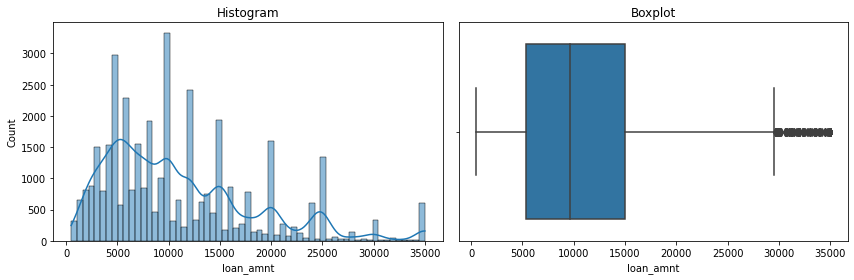

Summary Statistics:
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64




Column: funded_amnt_inv
Data Type: float64


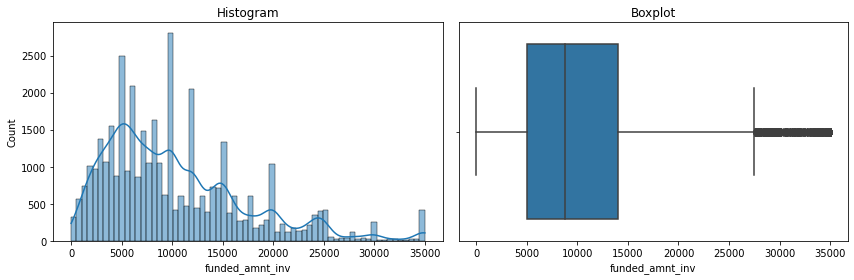

Summary Statistics:
count    38577.000000
mean     10222.481133
std       7022.720647
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64




Column: term
Data Type: int64


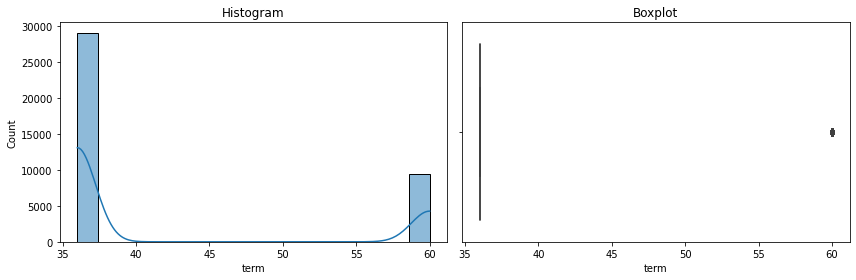

Summary Statistics:
count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64




Column: int_rate
Data Type: float64


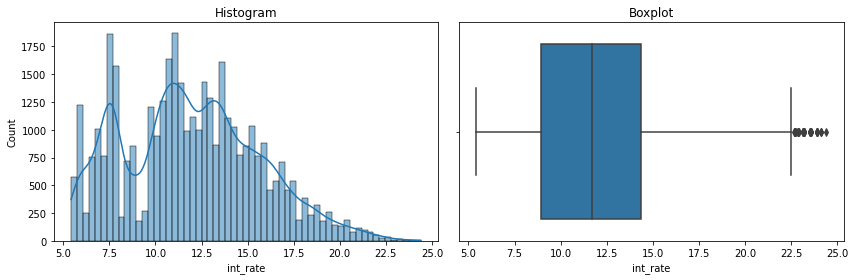

Summary Statistics:
count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64




Column: installment
Data Type: float64


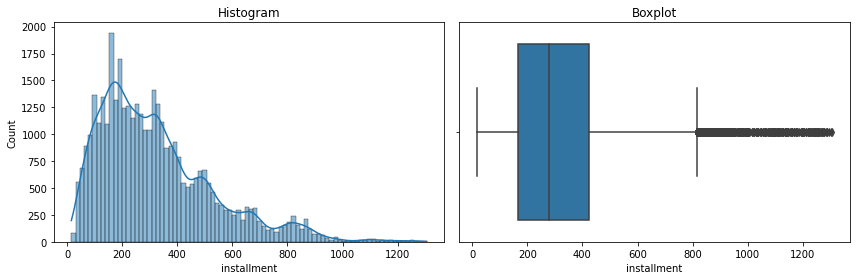

Summary Statistics:
count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64




Column: grade
Data Type: object


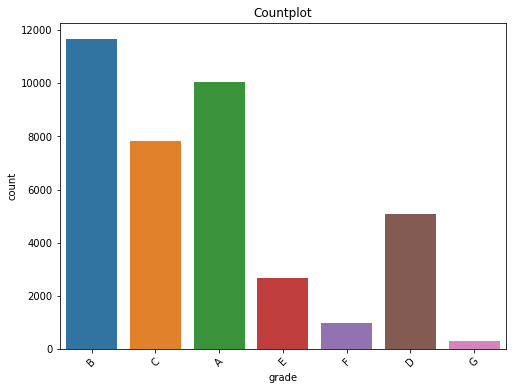



Column: sub_grade
Data Type: object


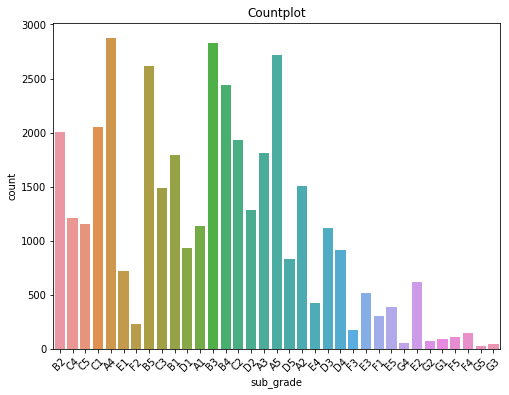



Column: emp_length
Data Type: int64


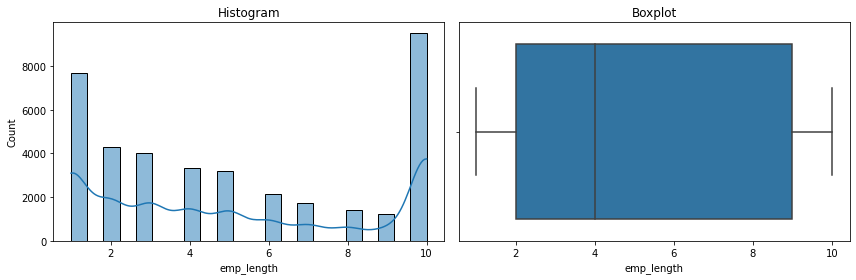

Summary Statistics:
count    38577.000000
mean         5.193302
std          3.449311
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64




Column: home_ownership
Data Type: object


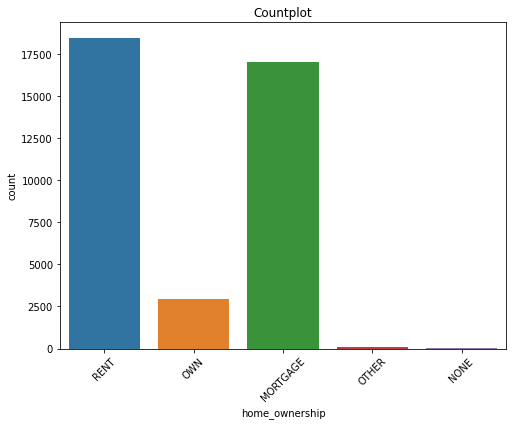



Column: annual_inc
Data Type: float64


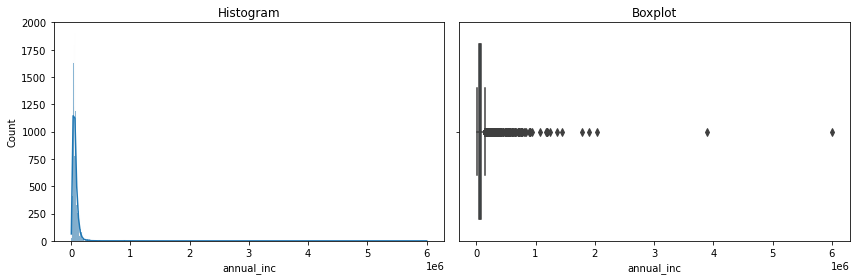

Summary Statistics:
count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




Column: verification_status
Data Type: object


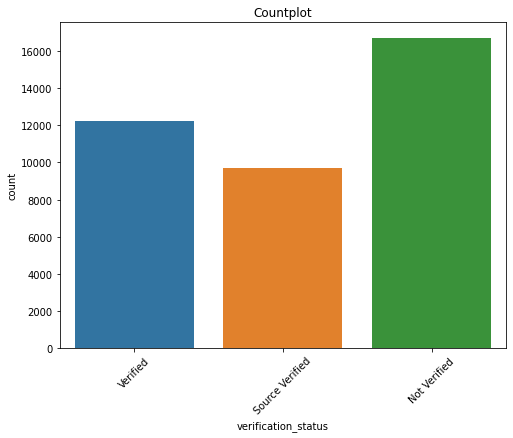



Column: issue_d
Data Type: datetime64[ns]


Column: loan_status
Data Type: object


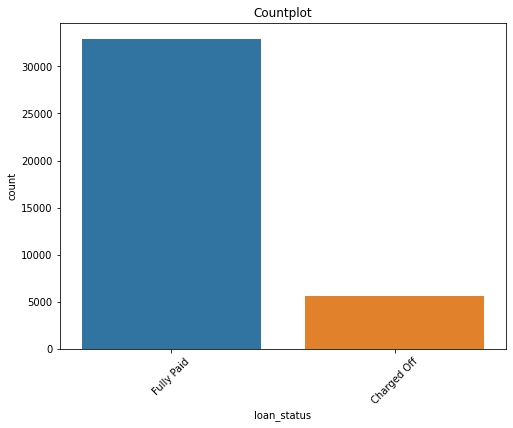



Column: purpose
Data Type: object


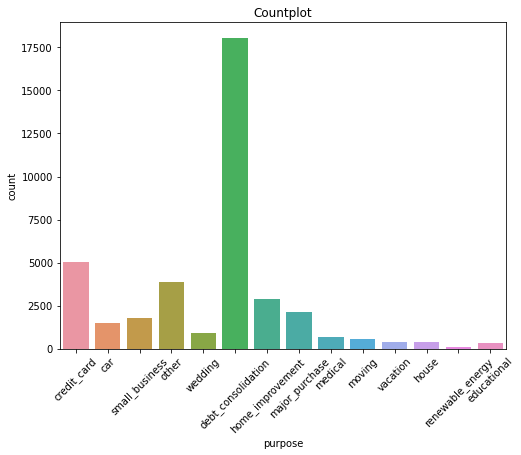



Column: addr_state
Data Type: object


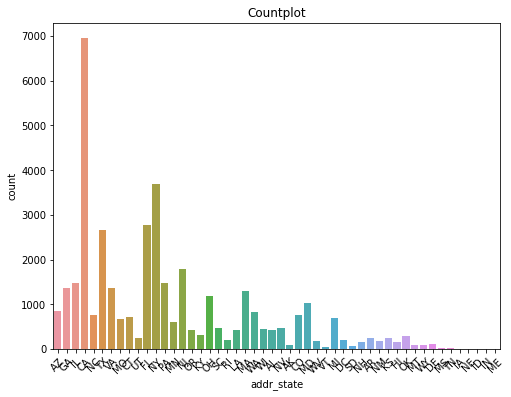



Column: dti
Data Type: float64


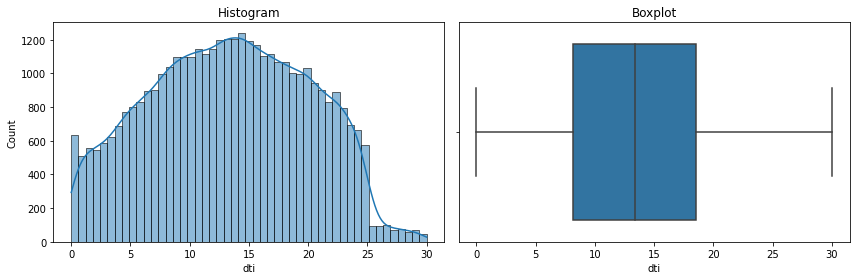

Summary Statistics:
count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64




Column: inq_last_6mths
Data Type: int64


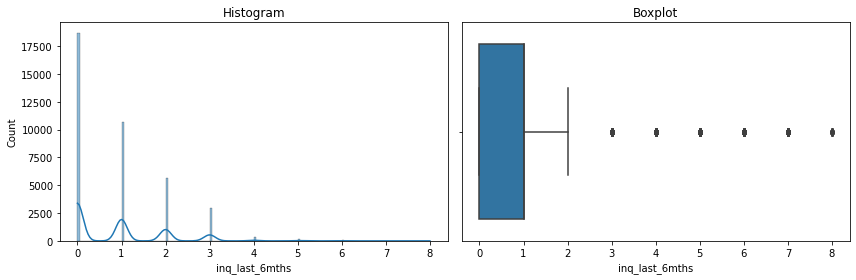

Summary Statistics:
count    38577.000000
mean         0.871737
std          1.071546
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64




Column: open_acc
Data Type: int64


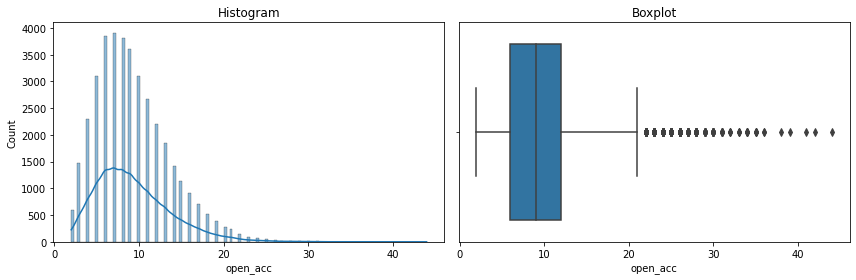

Summary Statistics:
count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64




Column: pub_rec
Data Type: int64


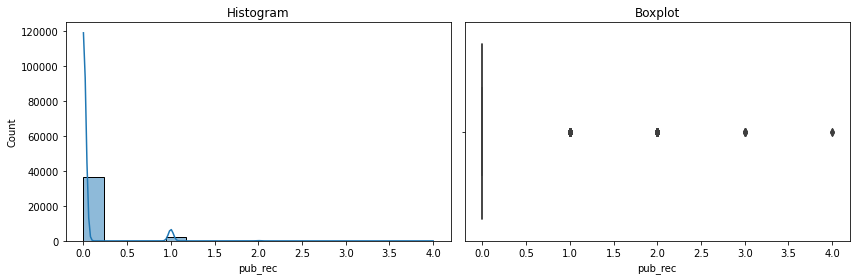

Summary Statistics:
count    38577.000000
mean         0.055422
std          0.237804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64




Column: revol_bal
Data Type: int64


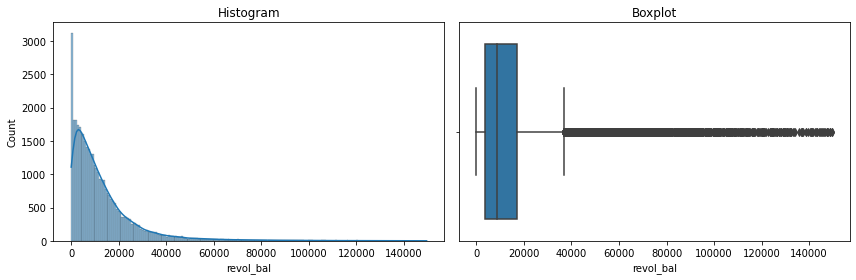

Summary Statistics:
count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64




Column: revol_util
Data Type: float64


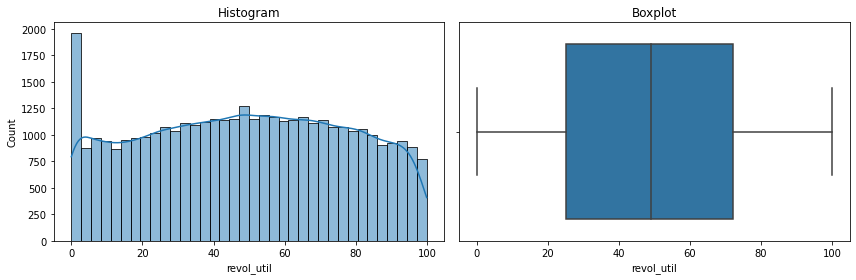

Summary Statistics:
count    38577.000000
mean        48.702777
std         28.346353
min          0.000000
25%         25.200000
50%         49.000000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64




Column: total_acc
Data Type: int64


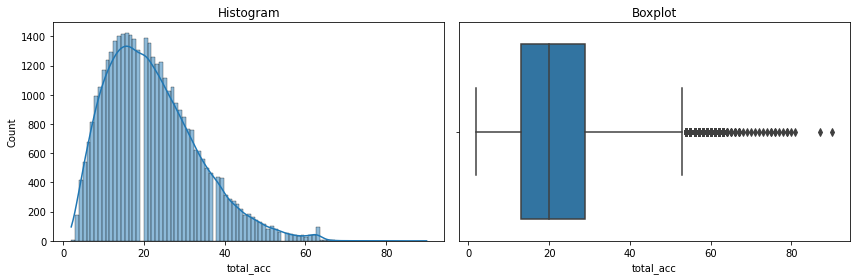

Summary Statistics:
count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64




Column: pub_rec_bankruptcies
Data Type: float64


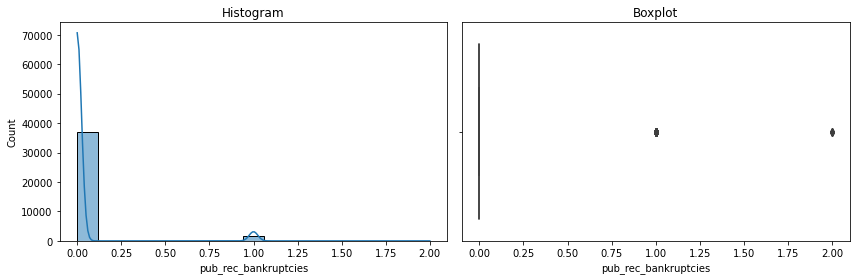

Summary Statistics:
count    38577.000000
mean         0.042694
std          0.202809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64




Column: issue_year
Data Type: int64


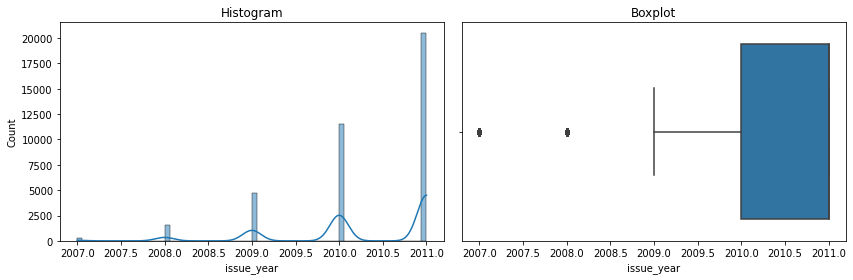

Summary Statistics:
count    38577.000000
mean      2010.309070
std          0.882658
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_year, dtype: float64




Column: issue_month
Data Type: int64


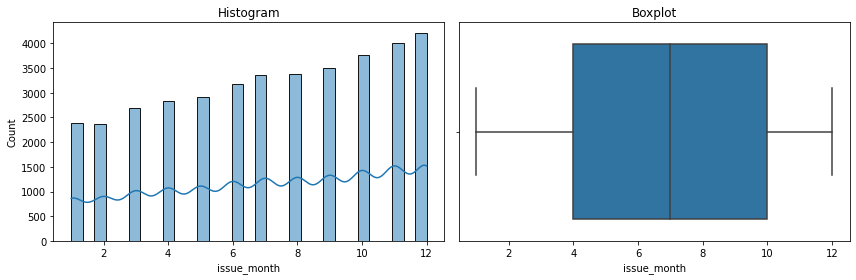

Summary Statistics:
count    38577.000000
mean         7.114757
std          3.408523
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: issue_month, dtype: float64






In [50]:
# Loop through each column and perform univariate analysis
for column in loan_data.columns:
       
    # Check data type
    dtype = loan_data[column].dtype
    
    # Print column name and data type
    print("Column:", column)
    print("Data Type:", dtype)
    
    # If the column is numeric, plot histogram and boxplot
    if dtype in ['int64', 'float64']:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogram
        sns.histplot(loan_data[column], ax=axes[0], kde=True)
        axes[0].set_title("Histogram")
        
        # Boxplot
        sns.boxplot(x=loan_data[column], ax=axes[1])
        axes[1].set_title("Boxplot")
        
        plt.tight_layout()
        plt.show()
    
    # If the column is categorical, plot countplot
    elif dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=loan_data[column])
        plt.title("Countplot")
        plt.xticks(rotation=45)
        plt.show()
    
    # Print summary statistics for numeric columns
    if dtype in ['int64', 'float64']:
        print("Summary Statistics:")
        print(loan_data[column].describe())
        print("\n")

    print("\n")

> After analyzing the above data/plots, we've identified columns with outliers. Let's examine these columns individually to gain a deeper understanding.








> **Verifying Outliers**

> checking for **annual income**

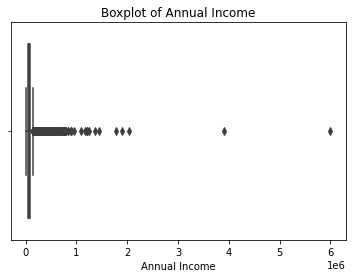

In [51]:
# Creating a boxplot of annual_inc
sns.boxplot(x=loan_data['annual_inc'])
# Set plot title and labels
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

> **Interpretation** -As we can see '**annual_inc**' contains some outliers.
>
>The below code calculates **outliers in the 'annual_inc'** column using the Interquartile Range (IQR) method.
It first calculates the first quartile (Q1) and the third quartile (Q3) of the data.
Then, it computes the Interquartile Range (IQR) as the difference between Q3 and Q1.
Lower and upper bounds for outliers are defined as 1.5 times the IQR below Q1 and above Q3, respectively.
Outliers below the lower bound and above the upper bound are counted using boolean indexing.
The total number of values in the 'annual_inc' column is also calculated.
Finally, it computes the percentage-wise weightage of outliers below the lower bound and above the upper bound by dividing the counts by the total number of values and multiplying by 100.
The counts and percentage-wise weightage of outliers are printed for analysis.

In [52]:
# Calculate quartiles
Q1 = loan_data['annual_inc'].quantile(0.25)
Q3 = loan_data['annual_inc'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers below the lower bound
lower_outliers_count = loan_data[loan_data['annual_inc'] < lower_bound]['annual_inc'].count()

# Count outliers above the upper bound
upper_outliers_count = loan_data[loan_data['annual_inc'] > upper_bound]['annual_inc'].count()

print("Count of outliers below lower bound:", lower_outliers_count)
print("Count of outliers above upper bound:", upper_outliers_count)

# Calculate total number of values in the annual_inc column
total_values = loan_data['annual_inc'].count()

# Calculate percentage-wise weightage of outliers below the lower bound
lower_outliers_percentage = (lower_outliers_count / total_values) * 100

# Calculate percentage-wise weightage of outliers above the upper bound
upper_outliers_percentage = (upper_outliers_count / total_values) * 100

print("Percentage-wise weightage of outliers below lower bound:", lower_outliers_percentage)
print("Percentage-wise weightage of outliers above upper bound:", upper_outliers_percentage)



Count of outliers below lower bound: 0
Count of outliers above upper bound: 1762
Percentage-wise weightage of outliers below lower bound: 0.0
Percentage-wise weightage of outliers above upper bound: 4.567488399823729


> The below code filters the DataFrame to include only upper outliers in the 'annual_inc' column based on the previously calculated upper bound.
Then, it further filters the upper outliers data to include only rows where the loan status is 'Charged Off'.
The number of upper outliers with loan status 'Charged Off' is calculated using the shape[0] attribute, which returns the number of rows.
Finally, it computes the percentage of upper outliers with loan status 'Charged Off' by dividing the count of 'Charged Off' loans among upper outliers by the total count of upper outliers and multiplying by 100.
The calculated percentage is printed for analysis.
>> *We are making sure that it is okay to remove outlier for annual_inc column*

In [53]:
# Filter DataFrame to include only upper outliers
upper_outliers_data = loan_data[loan_data['annual_inc'] > upper_bound]
# Calculate the number of upper outliers with loan status 'Charged Off'
charged_off_count = upper_outliers_data[upper_outliers_data['loan_status'] == 'Charged Off'].shape[0]
# Calculate percentage of upper outliers with loan status 'Charged Off'
charged_off_percentage = (charged_off_count / upper_outliers_count) * 100
print(charged_off_percentage)

11.12372304199773


> **Interpretation**:- Considering that the upper outliers, which constitute only 11% of the data, 
    are primarily 'Charged Off' loans, it's prudent to remove them from the dataset.

In [54]:
# removing the outliers now
loan_data = loan_data[(loan_data['annual_inc'] >= lower_bound) & (loan_data['annual_inc'] <= upper_bound)]


In [55]:
# after removing the outliers from annual income verifying the shape
loan_data.shape

(36815, 25)

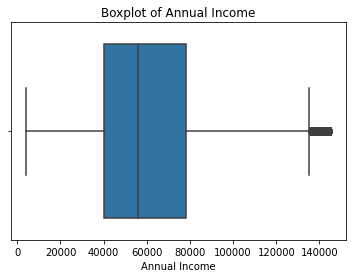

In [56]:
# Creating a boxplot again for 'annual_inc'
sns.boxplot(x=loan_data['annual_inc'])
# Set plot title and labels
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

> '**annual_inc**' data looks good now

> Similarly, calculating outliers in the **'loan_amnt'** column using the Interquartile Range (IQR) method

In [57]:
# Calculate quartiles
Q1 = loan_data['loan_amnt'].quantile(0.25)
Q3 = loan_data['loan_amnt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers below the lower bound
lower_outliers_count = loan_data[loan_data['loan_amnt'] < lower_bound]['loan_amnt'].count()



# Count outliers above the upper bound
upper_outliers_count = loan_data[loan_data['loan_amnt'] > upper_bound]['loan_amnt'].count()

print("Count of outliers below lower bound:", lower_outliers_count)
print("Count of outliers above upper bound:", upper_outliers_count)

# Calculate total number of values in the annual_inc column
total_values = loan_data['loan_amnt'].count()

# Calculate percentage-wise weightage of outliers below the lower bound
lower_outliers_percentage = (lower_outliers_count / total_values) * 100

# Calculate percentage-wise weightage of outliers above the upper bound
upper_outliers_percentage = (upper_outliers_count / total_values) * 100

print("Percentage-wise weightage of outliers below lower bound:", lower_outliers_percentage)
print("Percentage-wise weightage of outliers above upper bound:", upper_outliers_percentage)


Count of outliers below lower bound: 0
Count of outliers above upper bound: 550
Percentage-wise weightage of outliers below lower bound: 0.0
Percentage-wise weightage of outliers above upper bound: 1.4939562678256146


<AxesSubplot:xlabel='loan_amnt'>

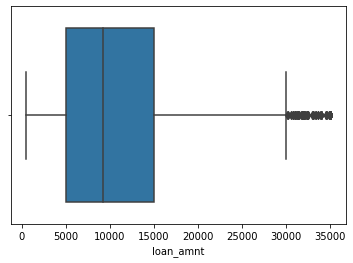

In [58]:
# Creating a boxplot of 'loan_amnt'
sns.boxplot(x=loan_data['loan_amnt'])

> **Interpretation**:- Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for **loan_amnt** column.

>> Creating a boxplot for **dti**, **funded_amnt_inv**, **int_rate**, **installment** columns

<AxesSubplot:xlabel='dti'>

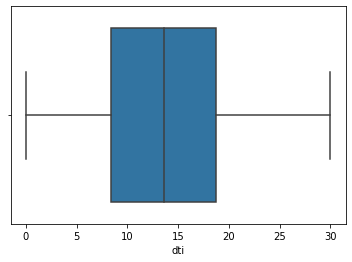

In [59]:
# Creating a boxplot of 'dti'
sns.boxplot(x = loan_data['dti'])

<AxesSubplot:xlabel='funded_amnt_inv'>

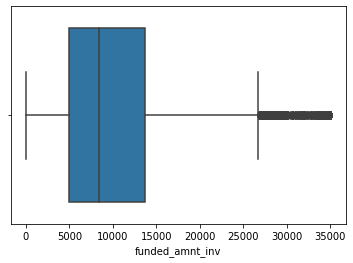

In [60]:
sns.boxplot(x = loan_data['funded_amnt_inv'])

<AxesSubplot:xlabel='installment'>

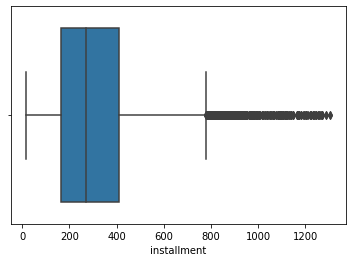

In [61]:
sns.boxplot(x = loan_data['installment'])

<AxesSubplot:xlabel='int_rate'>

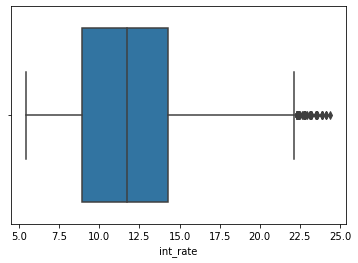

In [62]:
sns.boxplot(x = loan_data['int_rate'])

> **Interpretation**:-  Despite the presence of a few outlier values in the dataset, the distribution of the columns in question appears to be mostly continuous and does not significantly deviate from the expected pattern. Therefore, there is no compelling need to remove outliers or extreme values from **dti**, **funded_amnt_inv**, **installment** , **int_rate** columns either.

### Post-Outlier Analysis: Exploring Data Trends with Plots

> The below function, **plot_histogram_and_boxplot**, generates both a histogram and a boxplot for a specified column in a DataFrame.
It takes two parameters: data (the DataFrame containing the data) and column_name (the name of the column for which to plot the histogram and boxplot).
The function creates a figure with two subplots, one for the histogram and one for the boxplot, and sets their sizes.
It plots the histogram using Seaborn's histplot function and the boxplot using Seaborn's boxplot function.
Titles and x-axis labels are set for both plots to indicate the column being plotted.
The layout is adjusted to prevent overlap between the subplots.
Finally, the plots are displayed using plt.show().

In [63]:
def plot_histogram_and_boxplot(data, column_name):
    """
    Plot histogram, boxplot, and summary statistics for a given column in a DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to plot the histogram, boxplot, and summary statistics.
    """
    # Create a figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot histogram
    sns.histplot(data[column_name], ax=axes[0, 0], kde=True)
    axes[0, 0].set_title(f'Histogram of {column_name}')
    axes[0, 0].set_xlabel(column_name)

    # Plot boxplot
    sns.boxplot(x=data[column_name], ax=axes[0, 1])
    axes[0, 1].set_title(f'Boxplot of {column_name}')
    axes[0, 1].set_xlabel(column_name)

    # Plot summary statistics
    summary_stats = data[column_name].describe()
    summary_stats_str = '\n'.join([f'{stat}: {value}' for stat, value in summary_stats.items()])
    axes[1, 0].text(0.5, 0.5, summary_stats_str, fontsize=12, ha='center', va='center')
    axes[1, 0].axis('off')

    # Remove empty subplot
    fig.delaxes(axes[1, 1])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


#### Loan Amount -

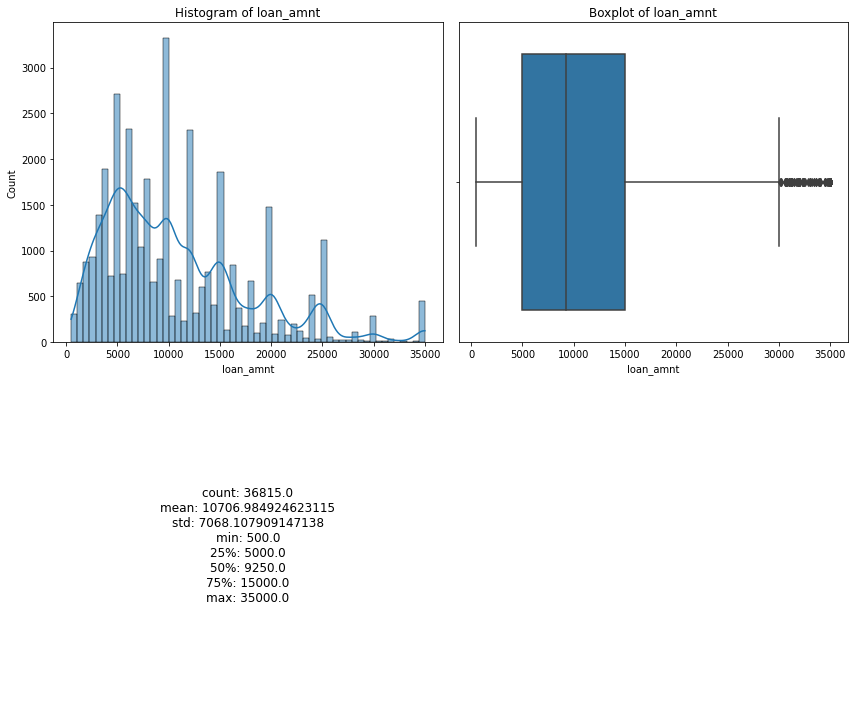

In [64]:
#checking loan_amnt column
plot_histogram_and_boxplot(loan_data, 'loan_amnt')

> **observation**:
The data appears to be positively skewed, as the mean is greater than the median (50th percentile). The majority of the loan amounts fall between 5,000 and 15,000, with some larger loans reaching up to 35,000. The standard deviation indicates that there is variability in loan amounts, with some loans being substantially higher or lower than the mean.

#### Annual Income -

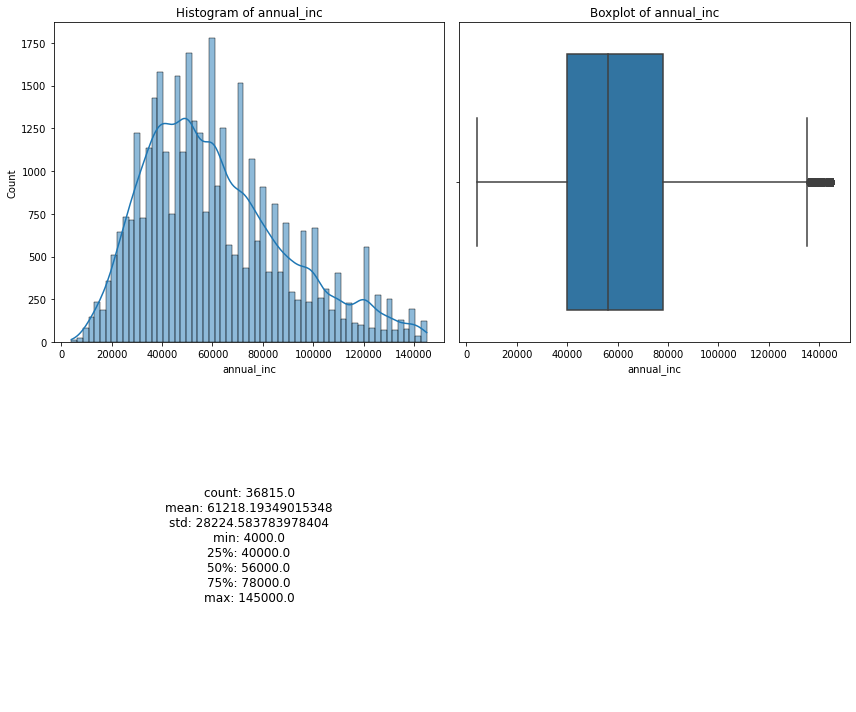

In [65]:
#checking annual_inc column
plot_histogram_and_boxplot(loan_data, 'annual_inc')

> **Observation:** The data appears to be positively skewed, as the mean is greater than the median (50th percentile).
The majority of the values fall between 40,000 and 78,000, with some larger values reaching up to 145,000.

#### Interest Rate -

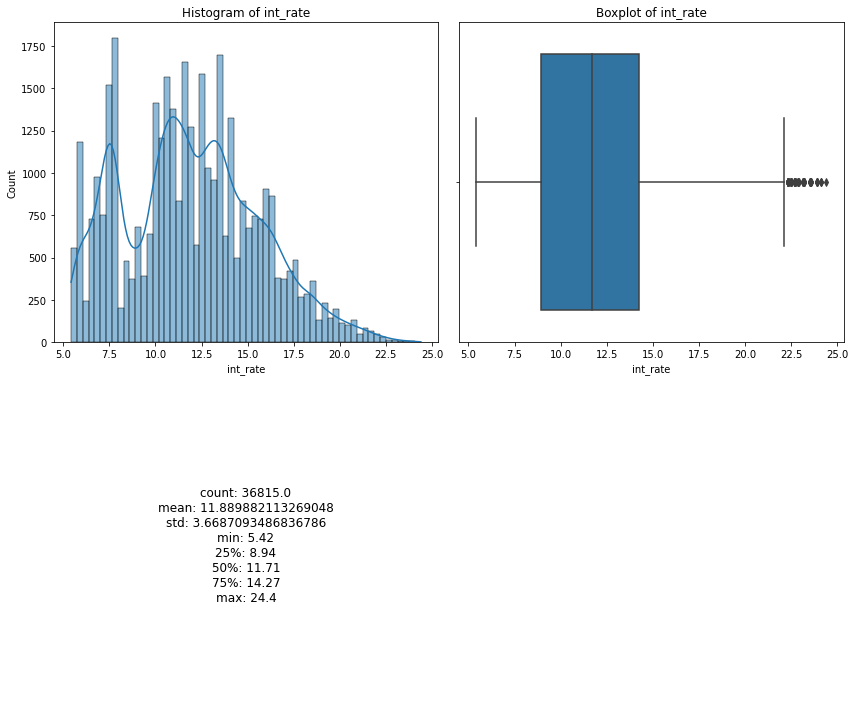

In [66]:
#checking int_rate column
plot_histogram_and_boxplot(loan_data, 'int_rate')

> **Observations**: The data appears to be relatively normally distributed, as the mean and median are close to each other.
The majority of the values fall between approximately 8%-14%.

### Visualizing Categorical Data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

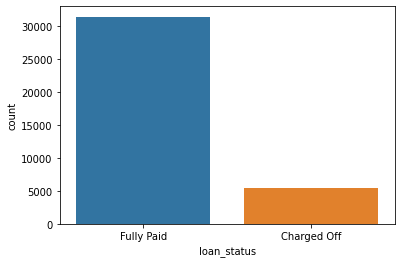

In [67]:
# Plotting a countplot to visualize the distribution of loan status in the dataset.
sns.countplot(x = 'loan_status', data = loan_data)

#### Analyzing Grade and Sub_Grade

> As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

In [68]:
# Converting the 'sub_grade' column to numeric values by extracting the last character of each string and converting it to an integer.
# Displaying the first few rows of the 'sub_grade' column after conversion.

loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

> Plotting a countplot to visualize the distribution of loan grades among charged-off loans.
> Filtering the data to include only charged-off loans and specifying the order of grades from 'A' to 'G'.


<AxesSubplot:xlabel='grade', ylabel='count'>

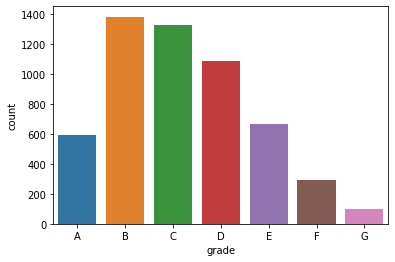

In [69]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

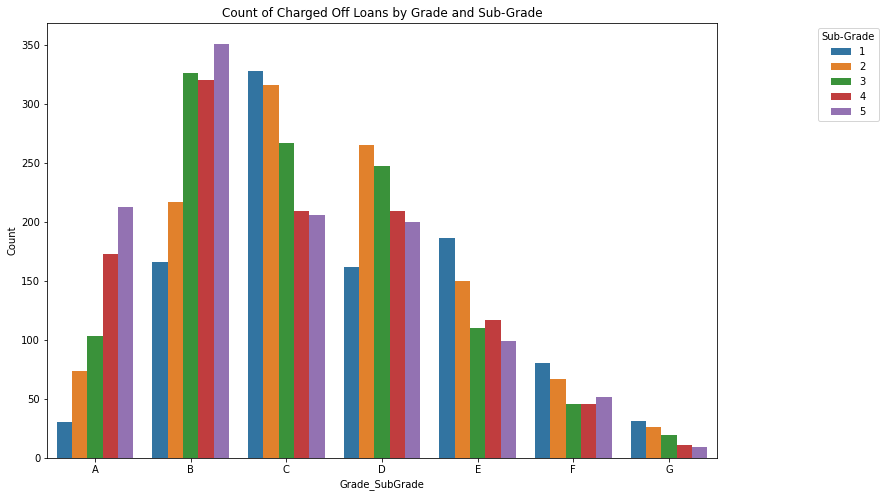

In [70]:
# Plotting a countplot to visualize the distribution of charged-off loans by grade and sub-grade.
# Filtering the data to include only charged-off loans and specifying the order of grades from 'A' to 'G'.

fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

# Set plot title and axis labels
ax.set_title('Count of Charged Off Loans by Grade and Sub-Grade')
ax.set_xlabel('Grade_SubGrade')
ax.set_ylabel('Count')

# Move legend outside the plot
ax.legend(loc='upper right', title='Sub-Grade', bbox_to_anchor=(1.25, 1))

> **Observations:** The above analysis with respect to the charged off loans for **grade and sub_grade** suggests the following. There is a more probability of defaulting when :
- Garde is 'B'
- Total Grade of 'B5' level

#### Analyzing home ownership

In [71]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [72]:
#There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [73]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

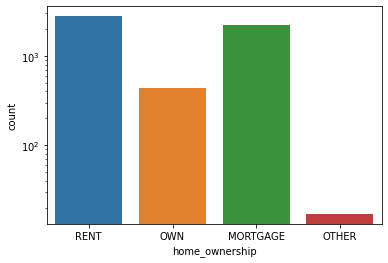

In [74]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for **home_ownership** suggests the following. There is a more probability of defaulting when :
- Applicants having house_ownership as 'RENT'

#### Analyzing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

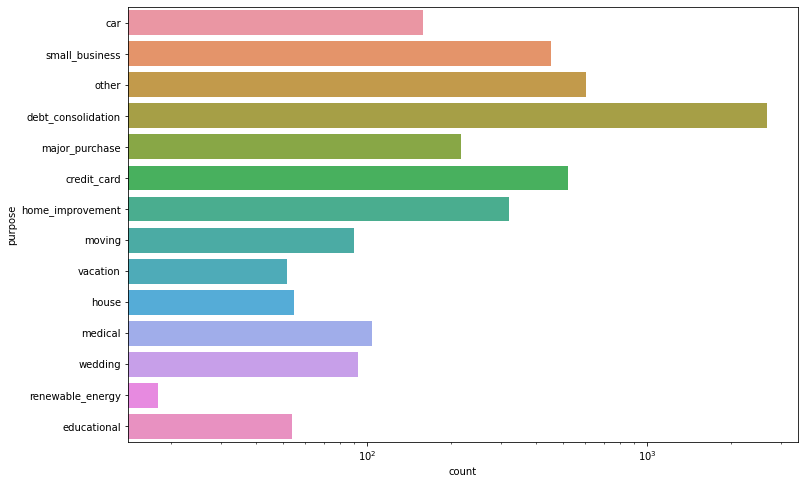

In [75]:
#Creating a subplot with a specified figure size and setting the x-axis scale to logarithmic.
#Plotting a countplot to visualize the distribution of charged-off loans by purpose.
#Filtering the data to include only charged-off loans.

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for **purpose** suggests the following. There is a more probability of defaulting when :
- Applicants who use the loan to clear other debts

#### Analyzing State

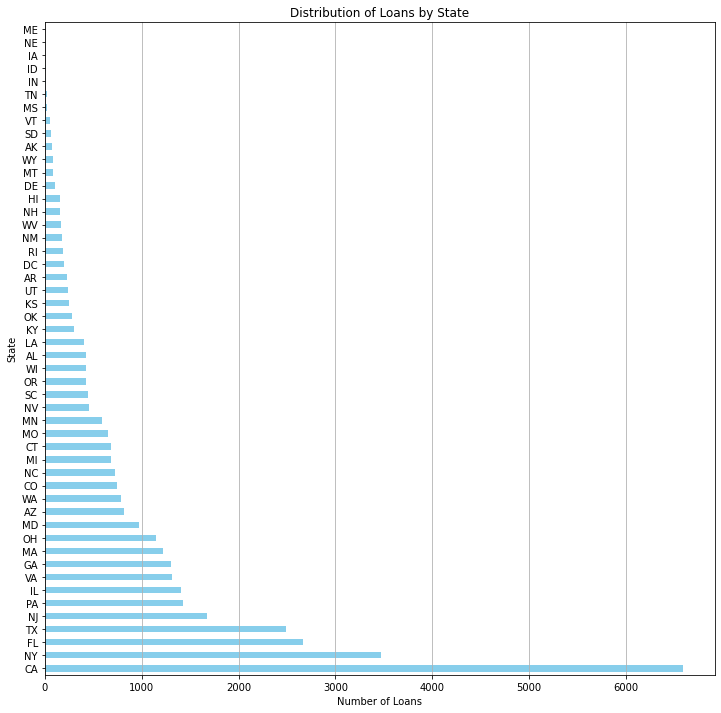

In [76]:
# Calculating the count of loans per state and creating a horizontal bar plot to visualize the distribution.
# Setting figure size, plot type, color, labels, and title for clarity.
# Adding gridlines along the x-axis for better readability of loan counts.


state_counts = loan_data['addr_state'].value_counts()

plt.figure(figsize=(12, 12))
state_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.title('Distribution of Loans by State')
plt.grid(axis='x')
plt.show()

> **Observation** - Most of the Loan applicants are from CA(State).

### To enhance our analysis, we can categorize certain columns using bins.


> creating bins/buckets for **int_rate**

In [77]:
loan_data['int_rate'].describe()

count    36815.000000
mean        11.889882
std          3.668709
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [78]:
# Creating groups for interest rates by categorizing them into five bins with specified ranges and labels.
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])


> creating bins/buckets for **open_acc**

In [79]:
loan_data['open_acc'].describe()

count    36815.000000
mean         9.174820
std          4.355099
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [80]:
#similarly, creating bins for open_acc
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

> creating bins/buckets for **revol_util**

In [81]:
loan_data['revol_util'].describe()

count    36815.000000
mean        48.667077
std         28.265704
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

In [82]:
#creating bins for Revolving line utilization rate 
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

> creating bins/buckets for **revol_bal**

In [83]:
loan_data['revol_bal'].describe()

count     36815.000000
mean      12369.150564
std       13858.072664
min           0.000000
25%        3565.500000
50%        8522.000000
75%       16212.000000
max      149000.000000
Name: revol_bal, dtype: float64

In [84]:
#creating bins for Total credit revolving balance 
loan_data['revol_bal_groups'] = pd.cut(loan_data['revol_bal'], bins=5,precision =0,labels=['0-3565', '3566-8522', '8523-16212', '16213-50000', '50001-149000'])

> creating bins/buckets for **total_acc**

In [85]:
loan_data['total_acc'].describe()

count    36815.000000
mean        21.672416
std         11.244773
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [86]:
#creating bins for total number of credit lines
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])


> creating bins/buckets for **annual_inc**

In [87]:
loan_data['annual_inc'].describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

In [88]:
# creating bins for annual income
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [89]:
#to verify newly added bins are added in the dataframe
loan_data.head(3)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_acc,pub_rec_bankruptcies,issue_year,issue_month,int_rate_groups,open_acc_groups,revol_util_groups,revol_bal_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,...,9,0.0,2011,12,9%-13%,2-10,80-100,0-3565,2-20,3k-31k
1,2500,2500.0,60,15.27,59.83,C,4,1,RENT,30000.0,...,4,0.0,2011,12,13%-17%,2-10,0-20,0-3565,2-20,3k-31k
2,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,...,10,0.0,2011,12,13%-17%,2-10,80-100,0-3565,2-20,3k-31k


In [90]:
# verify new columns are added as categorical data-type
loan_data.dtypes

loan_amnt                        int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                        int64
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
issue_year                       int64
issue_month                      int64
int_rate_groups          

### Analyzing interest rate wrt the interest rate bins created

<AxesSubplot:xlabel='emp_length', ylabel='count'>

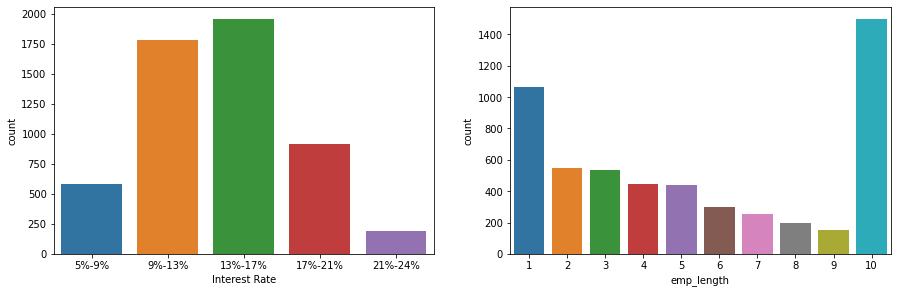

In [91]:
# Creating a subplot with a specified figure size to compare the count of charged-off loans across different interest rate groups and employment lengths.
# In the first subplot, a countplot is used to visualize the distribution of charged-off loans by interest rate group.
# In the second subplot, another countplot displays the distribution of charged-off loans by employment length.
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Interest_Group and Emp_length* suggests the following. There is a more probability of defaulting when :
- Applicants who receive interest at the rate of 13-17%
- Applicants with employement length of 10

### Analyzing open_acc, revol_util, revol_bal, total_acc, annual_inc 

> **Analyzing open_acc**

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

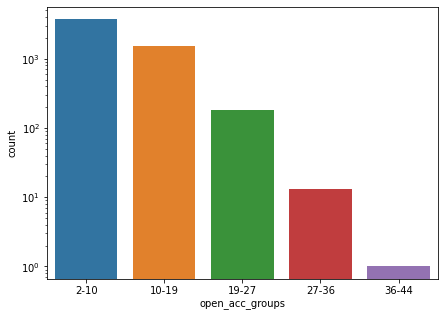

In [92]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Open Account Group* suggests the following. There is a more probability of defaulting when :
- Applicants who have 2-10 open accounts

> **Analyzing revol_util_groups**

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

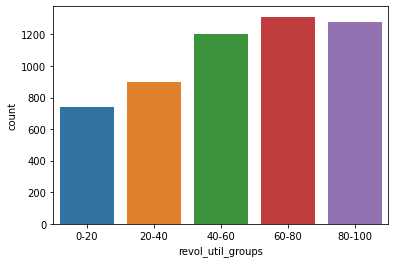

In [93]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Revolving line utilization rate group* suggests the following. There is a more probability of defaulting when :
- Applicants who are having 60-80% utilization rate

> **Analyzing revol_bal_groups**

<AxesSubplot:xlabel='revol_bal_groups', ylabel='count'>

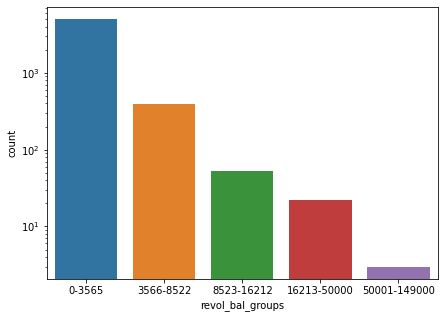

In [94]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='revol_bal_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Revolving Balance Group* suggests the following. There is a more probability of defaulting when :
- Applicants who have Revolving Balance in the range of 0-3565


> **Analyzing total_acc_groups**

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

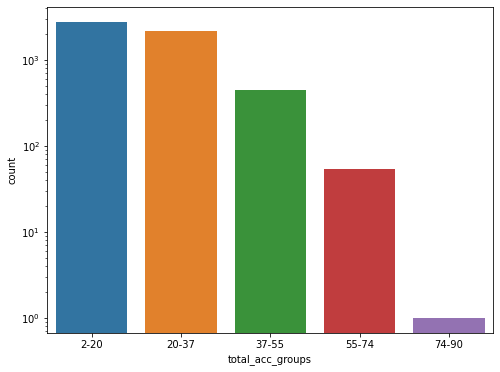

In [95]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Total acc/Total credit lines group* suggests the following. There is a more probability of defaulting when :
- Applicants who have credit lines in 2-20 range

> **Analyzing anual_inc_groups**

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

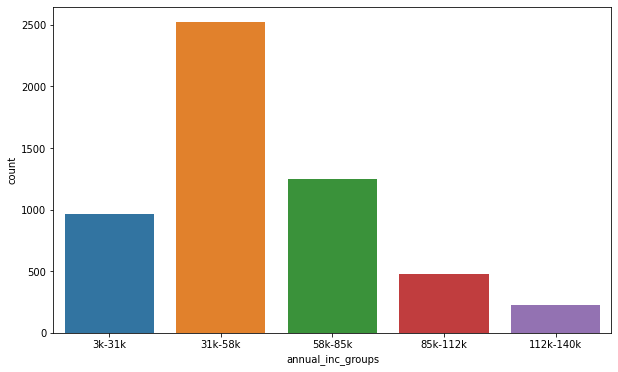

In [96]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Annual Income Group* suggests the following. There is a more probability of defaulting when :
- Applicants who have an income of range 31k-58k

> **Analyzing term column**

<AxesSubplot:xlabel='count', ylabel='term'>

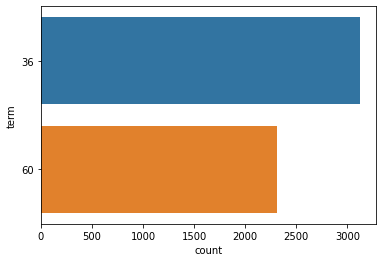

In [97]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Term* suggests the following. There is a more probability of defaulting when :
- Applicants who have Term of 36 months

> **Analyzing verification_status**

<AxesSubplot:xlabel='verification_status', ylabel='count'>

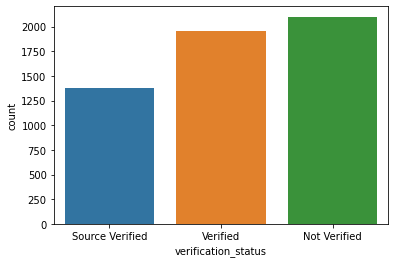

In [98]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Verification Status* suggests the following. There is a more probability of defaulting when :
- Applicants when verification status says Not Verified

> **Analyzing inq_last_6mths**

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

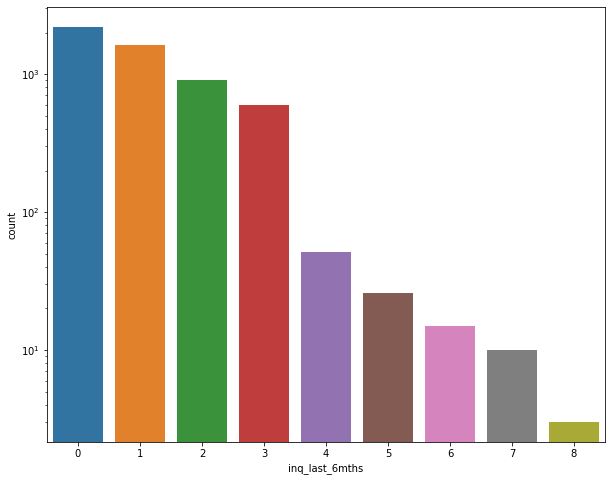

In [99]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for * inquiries in past 6 months* suggests the following. There is a more probability of defaulting when :
- number of enquiries in last 6 months is 0

> **Analyzing pub_rec**

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

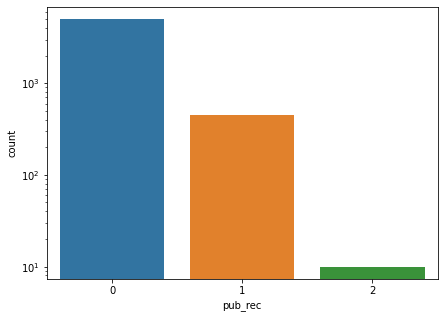

In [100]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *derogatory public records* suggests the following. There is a more probability of defaulting when :
- number of derogatory public records is 0

#### Analyzing installment, dti, loan_amnt columns and making bins

> creating bins/buckets for **installment**

In [101]:
loan_data['installment'].describe()

count    36815.000000
mean       312.593015
std        199.806808
min         15.690000
25%        163.305000
50%        271.140000
75%        409.700000
max       1305.190000
Name: installment, dtype: float64

In [102]:
# creating bins for installment
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])

> creating bins/buckets for **funded_amnt_inv**

In [103]:
loan_data['funded_amnt_inv'].describe()

count    36815.000000
mean      9916.487123
std       6750.340903
min          0.000000
25%       4988.980000
50%       8400.000000
75%      13687.860000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [104]:
# creating bins for funded_amnt_inv 
loan_data['funded_amnt_inv_groups'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

> creating bins/buckets for **loan_amnt**

In [105]:
loan_data['loan_amnt'].describe()

count    36815.000000
mean     10706.984925
std       7068.107909
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [106]:
# creating bins for loan_amnt
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

> creating bins/buckets for **dti**

In [107]:
loan_data['dti'].describe()

count    36815.000000
mean        13.437614
std          6.660651
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64

In [108]:
# creating bins for debt to income(dti)
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

> **Analyzing installment_groups**

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

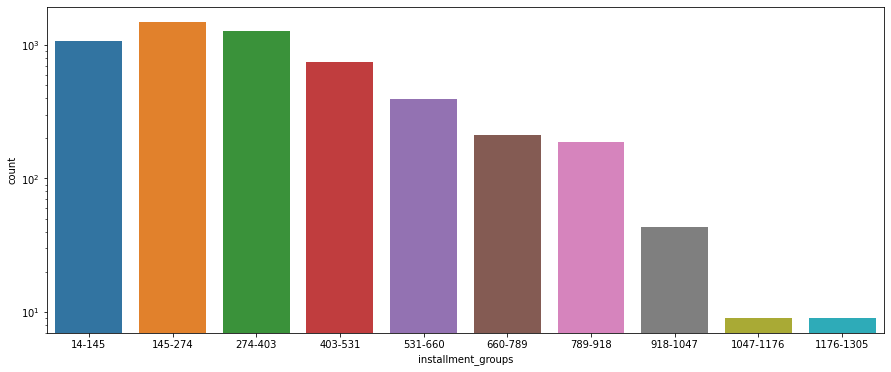

In [109]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Installment Group* suggests the following. There is a more probability of defaulting when :
- When monthly installments are between 145-274

> **Analyzing dti_groups**

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

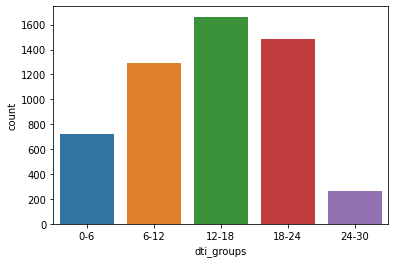

In [110]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *DTI group* suggests the following. There is a more probability of defaulting when :
- Applicants DTI ratio is in 12-18 range

> **Analyzing funded_amnt_inv_groups**

<AxesSubplot:xlabel='funded_amnt_inv_groups', ylabel='count'>

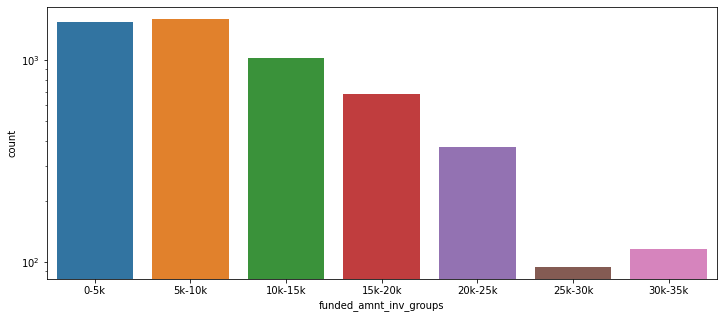

In [111]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Funded amount_inv Group* suggests the following. There is a more probability of defaulting when :
- When funded amount by investor is between 5k-10k

> **Analyzing loan_amnt_groups**

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

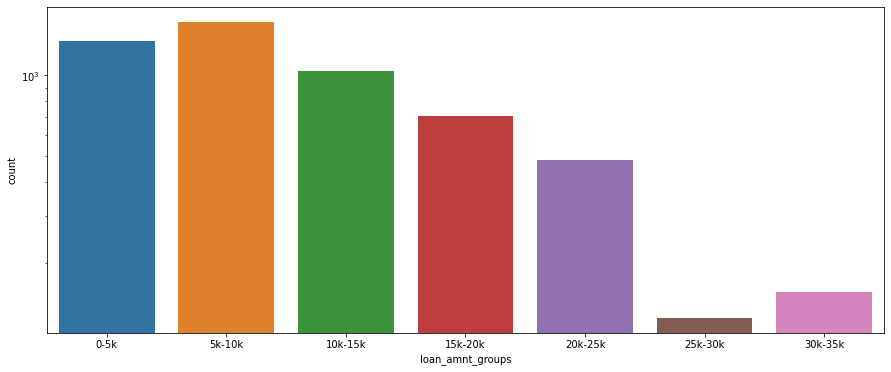

In [112]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *Loan amount Group* suggests the following. There is a more probability of defaulting when :
- When Loan amount is between 5k-10k

#### Analyzing by issued month and year

<AxesSubplot:xlabel='issue_year', ylabel='count'>

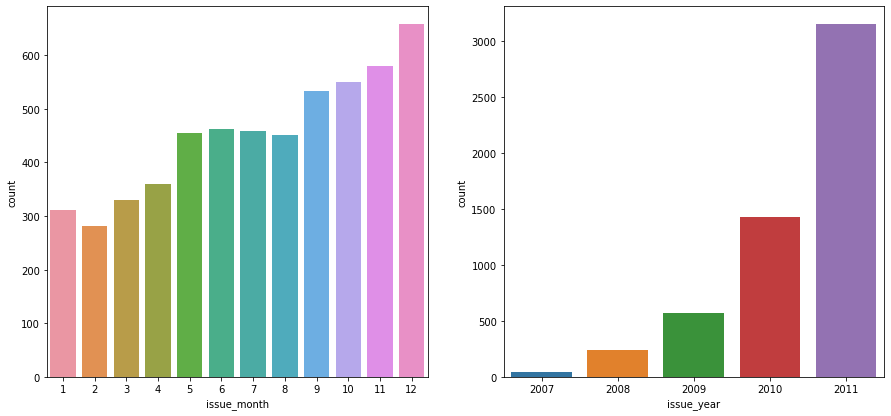

In [113]:
# Plotting count of charged off loans by issue month and year
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

> **Observations:** The above analysis with respect to the charged off loans for *issue_month and issue_year* suggests the following :
- Maximum number of defaults occured when the loan was sanctioned/issued in Dec(12)
- Loan issued in the year 
   - *Maximum Defaults in December (Issue Month 12)*: The analysis indicates that the highest number of loan defaults occurred when loans were issued in December. This suggests a potential correlation between loans issued during the holiday season and a higher likelihood of default. Possible reasons might include increased spending during the holidays, financial strain, or other seasonal factors affecting borrowers' ability to repay.
   - *Loans Issued in 2011 (Issue Year)*: Another notable observation is that a significant number of defaults were associated with loans issued in the year 2011. This could indicate specific economic conditions or lending practices prevalent during that period that may have contributed to a higher default rate.

### 5. Bivariate Analysis

#### Bivariate analysis to explore the relationship between annual income and Chargedoff_Proportion

In [114]:
# Grouping the data by annual income groups and loan status
inc_range_vs_loan = loan_data.groupby(['annual_inc_groups', 'loan_status']).loan_status.count().unstack().reset_index()

# Calculating the total count of charged off and fully paid loans
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid']

# Calculating the proportion of charged off loans relative to the total
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']

# Sorting the dataframe by Chargedoff_Proportion in descending order
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,3k-31k,961,4246,5207,0.184559
1,31k-58k,2521,13262,15783,0.159729
2,58k-85k,1245,8204,9449,0.131760
4,112k-140k,226,1795,2021,0.111826
3,85k-112k,478,3877,4355,0.109759


> The below function **plot_barplot** generates a bar plot to visualize the relationship between a categorical variable and the proportion of charged-off instances. It takes the following parameters:

>**params are**
 - data: DataFrame containing the data.
>
 - x: The column name for the categorical variable to be plotted on the x-axis.
>
 - palette: Color palette for the plot.
>
 - title: Title for the plot.
>
 - x_label: Label for the x-axis.

In [115]:
def plot_barplot(data, x, palette, title, x_label):
    plt.figure(figsize=(12, 8), facecolor='lightgrey')

    # Create a bar plot
    ax = sns.barplot(x=x, y='Chargedoff_Proportion', data=data, palette=palette)

    # Set title, labels, and ticks with custom font properties
    plt.title(f'Charged-off Proportion vs. {title}', fontsize=18, color='navy', fontweight='bold')
    plt.xlabel(x_label, fontsize=14, color='navy', fontweight='bold')
    plt.ylabel('Charged-off Proportion', fontsize=14, color='navy', fontweight='bold')
    plt.xticks(fontsize=12, color='navy', rotation=45)
    plt.yticks(fontsize=12, color='navy')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()


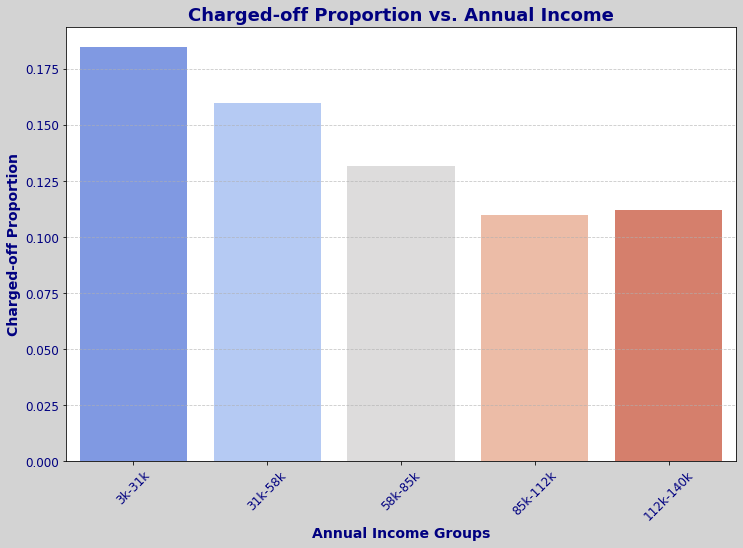

In [116]:
# using above function Plotting bar plot to visualize the relationship between annual income groups /
# and the proportion of charged-off instances
plot_barplot(inc_range_vs_loan, 'annual_inc_groups', 'coolwarm', 'Annual Income', 'Annual Income Groups')

>  **Observations:**
  - Income range 85000+  has less chances of charged off.
  - Income range 3k-31k has high chances of charged off.
  - Notice that with increase in annual income charged off proportion got decreased.

#### Bivariate Analysis on derogatory public records against Chargedoff_Proportion -

In [117]:
pub_rec_vs_loan = loan_data.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_vs_loan['Total'] = pub_rec_vs_loan['Charged Off']+ pub_rec_vs_loan['Fully Paid']
pub_rec_vs_loan['Chargedoff_Proportion'] = pub_rec_vs_loan['Charged Off'] / pub_rec_vs_loan['Total']
pub_rec_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,449.0,1520.0,1969.0,0.228035
2,2,10.0,36.0,46.0,0.217391
0,0,4972.0,29820.0,34792.0,0.142906
3,3,0.0,6.0,6.0,0.000000
4,4,0.0,2.0,2.0,0.000000


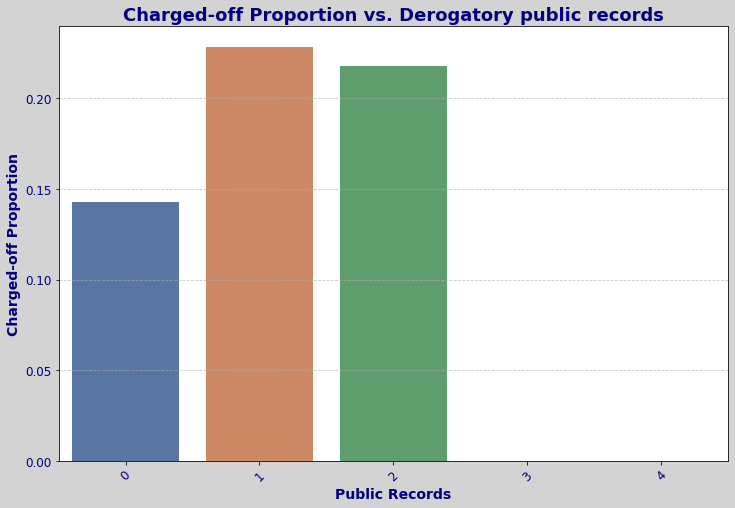

In [118]:
# using above function Plotting bar plot to visualize the relationship between derogatory public records /
# and the proportion of charged-off instances
plot_barplot(pub_rec_vs_loan, 'pub_rec', 'deep', 'Derogatory public records', 'Public Records')

>  **Observations:**
  - For individuals with 0 public records, the proportion of charged-off loans is the lowest.
  - When there is one public record, the proportion of charged-off loans increases to around 22.80%, which is the highest among the given categories.
  - Similarly, for those with two public records, the proportion of charged-off loans is also high, at approximately 21.74%.
  - Interestingly, for individuals with three or four public records, there are no charged-off loans recorded, indicating a possible anomaly or lack of sufficient data in these categories.
  
> **Univariate observation vs Bivariate observation** - 
 - While the count of charged-off loans was higher when the number of public records was 0 during univariate analysis, further exploration in the bivariate analysis reveals that the proportion of charged-off loans is higher when the number of public records is 1 or 2. This suggests that although the absolute count of charged-off loans may be higher when there are no public records, the likelihood of defaulting on a loan increases with a higher number of public records.

#### Bivariate Analysis on Interest Rate Group against Chargedoff_Proportion 

In [119]:
int_rate_range_vs_loan = loan_data.groupby(['int_rate_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_range_vs_loan['Total'] = int_rate_range_vs_loan['Charged Off']+ int_rate_range_vs_loan['Fully Paid']
int_rate_range_vs_loan['Chargedoff_Proportion'] = int_rate_range_vs_loan['Charged Off'] / int_rate_range_vs_loan['Total']
int_rate_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,21%-24%,194,271,465,0.417204
3,17%-21%,919,2188,3107,0.295784
2,13%-17%,1960,8266,10226,0.191668
1,9%-13%,1780,11751,13531,0.131550
0,5%-9%,578,8908,9486,0.060932


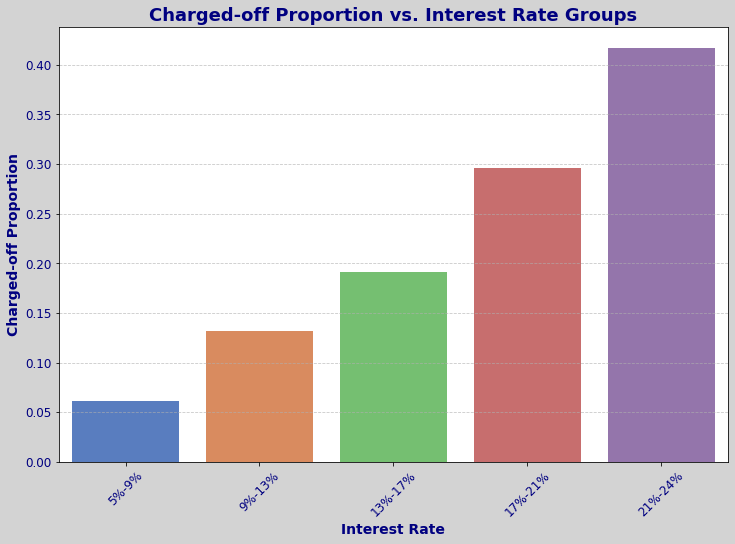

In [120]:
# using above function Plotting bar plot to visualize the relationship between Interest rate Groups /
# and the proportion of charged-off instances
plot_barplot(int_rate_range_vs_loan, 'int_rate_groups', 'muted', 'Interest Rate Groups', 'Interest Rate')

>  **Observations:**
  - The proportion of charged-off loans tends to increase as the interest rate groups rise.
  - For the interest rate group of 21%-24%, the charged-off proportion is the highest
  - As the interest rate groups decrease, the proportion of charged-off loans also decreases.
> **Univariate observation vs Bivariate observation** -
  - In univariate analysis, a higher count of charged-off loans was observed in the interest rate group of 13%-17%. However, in bivariate analysis, when considering the proportion of charged-off loans relative to the total number of loans in each interest rate group, it was found that the charged-off proportion was highest in the interest rate group of 21%-24%.

  - This discrepancy suggests that while the count of charged-off loans may be higher in a particular interest rate group in univariate analysis, it is essential to consider the proportion relative to the total number of loans to understand the true risk associated with each interest rate group.

#### Bivariate Analysis on Open Credit Lines against Chargedoff_Proportion 


In [121]:
open_acc_range_vs_loan = loan_data.groupby(['open_acc_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
open_acc_range_vs_loan['Total'] = open_acc_range_vs_loan['Charged Off']+ open_acc_range_vs_loan['Fully Paid']
open_acc_range_vs_loan['Chargedoff_Proportion'] = open_acc_range_vs_loan['Charged Off'] / open_acc_range_vs_loan['Total']
open_acc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,open_acc_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,27-36,13,48,61,0.213115
2,19-27,184,1006,1190,0.154622
0,2-10,3705,21216,24921,0.148670
1,10-19,1528,9108,10636,0.143663
4,36-44,1,6,7,0.142857


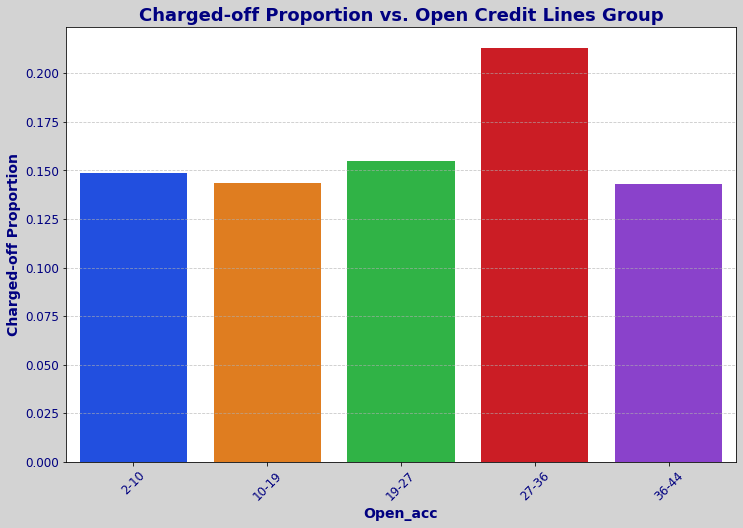

In [122]:
# using above function Plotting bar plot to visualize the relationship between Open Credit Lines Group /
# and the proportion of charged-off instances
plot_barplot(open_acc_range_vs_loan, 'open_acc_groups', 'bright', 'Open Credit Lines Group', 'Open_acc')

>  **Observations:**
  - The highest proportion of charged-off loans is observed in the "27-36" range
  - The next highest proportion of charged-off loans is in the "19-27" range
  - Interestingly, the "36-44" range has the lowest proportion of charged-off loans, with only one instance.
> **Univariate observation vs Bivariate observation** -
  - In univariate analysis, it was observed that charged-off loans were more likely in the "2-10" range. However, in the bivariate analysis, it's evident that the proportion of charged-off loans is higher in the "27-36" range.

  - This discrepancy could be due to the influence of other factors when considering the number of open credit lines alongside loan status. It's possible that borrowers with a higher number of open credit lines within the "27-36" range may have specific characteristics or financial behaviors that make them more likely to default on their loans, despite having more open credit lines compared to those in the "2-10" range.

#### Bivariate Analysis on Revolving line utilization rate against Chargedoff_Proportion 

In [123]:
revol_util_range_vs_loan = loan_data.groupby(['revol_util_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
revol_util_range_vs_loan['Total'] = revol_util_range_vs_loan['Charged Off']+ revol_util_range_vs_loan['Fully Paid']
revol_util_range_vs_loan['Chargedoff_Proportion'] = revol_util_range_vs_loan['Charged Off'] / revol_util_range_vs_loan['Total']
revol_util_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,revol_util_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,80-100,1280,5052,6332,0.202148
3,60-80,1311,6324,7635,0.171709
2,40-60,1199,6905,8104,0.147952
1,20-40,898,6525,7423,0.120975
0,0-20,743,6578,7321,0.101489


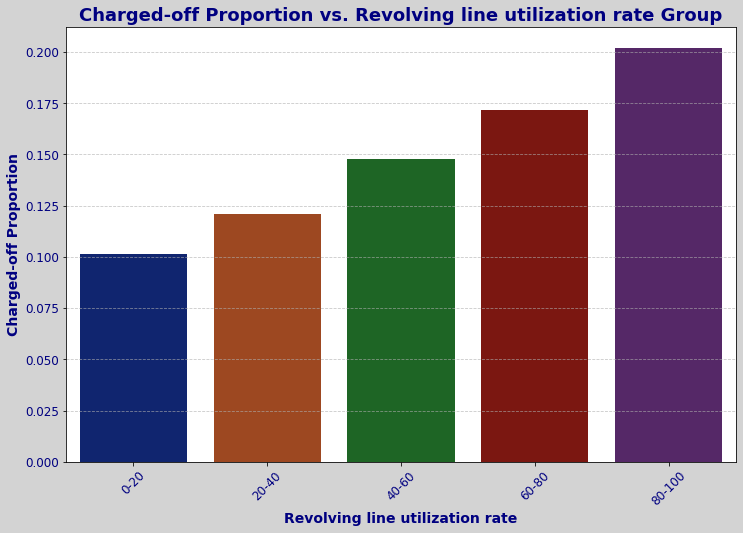

In [124]:
# using above function Plotting bar plot to visualize the relationship between Revolving line utilization rate /
# and the proportion of charged-off instances
plot_barplot(revol_util_range_vs_loan, 'revol_util_groups', 'dark', 'Revolving line utilization rate Group', 'Revolving line utilization rate')

>  **Observations:**
  - The data suggests a trend where borrowers with higher revolving line utilization rates tend to have a higher proportion of charged-off loans
  - Borrowers in the "80-100" range, indicating high utilization rates, have the highest proportion of charged-off loans, followed by those in the "60-80" range
  - Conversely, borrowers in the "0-20" range, indicating low utilization rates, have the lowest proportion of charged-off loans.
  - This observation aligns with the common understanding that higher levels of debt utilization may indicate financial strain, leading to a higher likelihood of loan default.
  - Lenders may consider these insights when assessing the risk associated with borrowers based on their revolving line utilization rates.

#### Bivariate Analysis on Total credit revolving balance against Chargedoff_Proportion

In [125]:
revol_bal_range_vs_loan = loan_data.groupby(['revol_bal_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
revol_bal_range_vs_loan['Total'] = revol_bal_range_vs_loan['Charged Off']+ revol_bal_range_vs_loan['Fully Paid']
revol_bal_range_vs_loan['Chargedoff_Proportion'] = revol_bal_range_vs_loan['Charged Off'] / revol_bal_range_vs_loan['Total']
revol_bal_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,revol_bal_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,3566-8522,390,2000,2390,0.163180
3,16213-50000,22,113,135,0.162963
0,0-3565,4964,28871,33835,0.146712
2,8523-16212,52,370,422,0.123223
4,50001-149000,3,30,33,0.090909


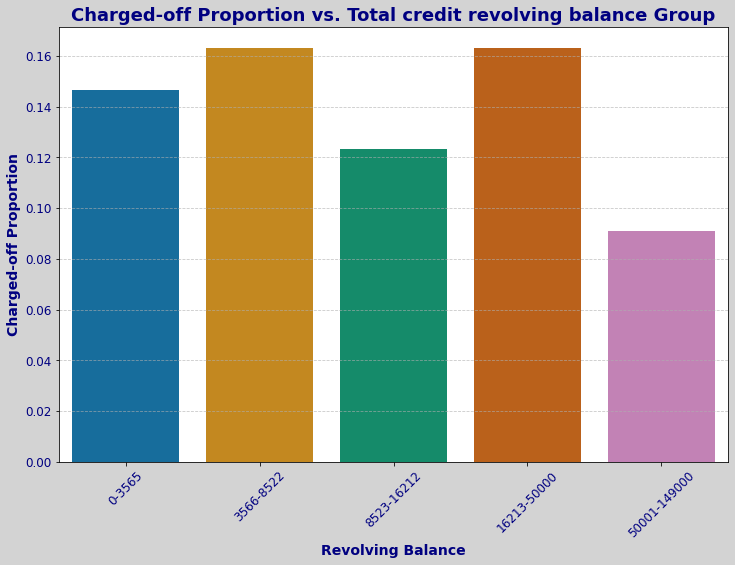

In [126]:
# using above function Plotting bar plot to visualize the relationship between Total credit revolving balance /
# and the proportion of charged-off instances
plot_barplot(revol_bal_range_vs_loan, 'revol_bal_groups', 'colorblind', 'Total credit revolving balance Group', 'Revolving Balance')

>  **Observations:**
  - The highest proportion of charged-off loans is observed in the '3566-8522' and '16213-50000' revol_bal_groups, with approximately 16.3% of loans in each group resulting in charged-off status.
  - The '0-3565' revol_bal_group, despite having the highest count of charged-off loans, exhibits a slightly lower proportion of charged-off loans at approximately 14.7%
  
> **Univariate observation vs Bivariate observation** - 
 - This suggests that while the '0-3565' revol_bal_group had the highest count of charged-off loans in univariate analysis, the proportion of charged-off loans within this group is not the highest compared to other revol_bal_groups. Other factors such as the overall size of each revol_bal_group and its composition may influence this discrepancy.

#### Bivariate Analysis on total number of credit lines against Chargedoff_Proportion

In [127]:
total_acc_range_vs_loan = loan_data.groupby(['total_acc_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
total_acc_range_vs_loan['Total'] = total_acc_range_vs_loan['Charged Off']+ total_acc_range_vs_loan['Fully Paid']
total_acc_range_vs_loan['Chargedoff_Proportion'] = total_acc_range_vs_loan['Charged Off'] / total_acc_range_vs_loan['Total']
total_acc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,total_acc_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2-20,2765,14934,17699,0.156224
2,37-55,448,2624,3072,0.145833
3,55-74,54,323,377,0.143236
1,20-37,2163,13493,15656,0.138158
4,74-90,1,10,11,0.090909


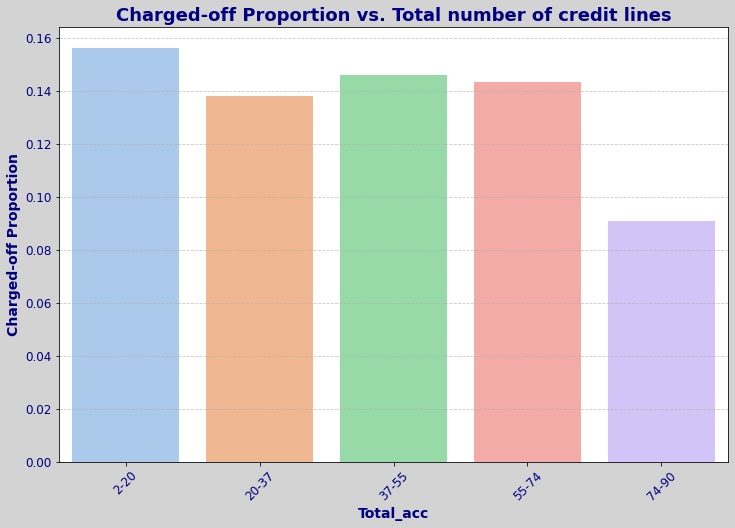

In [128]:
# using above function Plotting bar plot to visualize the relationship between Total credit lines/
# and the proportion of charged-off instances
plot_barplot(total_acc_range_vs_loan, 'total_acc_groups', 'pastel', 'Total number of credit lines', 'Total_acc')

>  **Observations:**
  - The '2-20' total_acc_group has the highest count of charged-off loans, with 2765 loans resulting in charged-off status. However, the proportion of charged-off loans in this group is approximately 15.6%
  - As the total_acc_groups increase, the proportion of charged-off loans tends to decrease, with the '74-90' total_acc_group having the lowest proportion at approximately 9.1%
  - Despite having a lower count of charged-off loans, the '74-90' total_acc_group exhibits the lowest proportion of charged-off loans among all groups, indicating a potential inverse relationship between total_acc_groups and charged-off proportion
 

#### Bivariate Analysis on Term against Chargedoff_Proportion

In [129]:
term_vs_loan = loan_data.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_vs_loan['Total'] = term_vs_loan['Charged Off']+ term_vs_loan['Fully Paid']
term_vs_loan['Chargedoff_Proportion'] = term_vs_loan['Charged Off'] / term_vs_loan['Total']
term_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,term,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,60,2311,6667,8978,0.257407
0,36,3120,24717,27837,0.112081


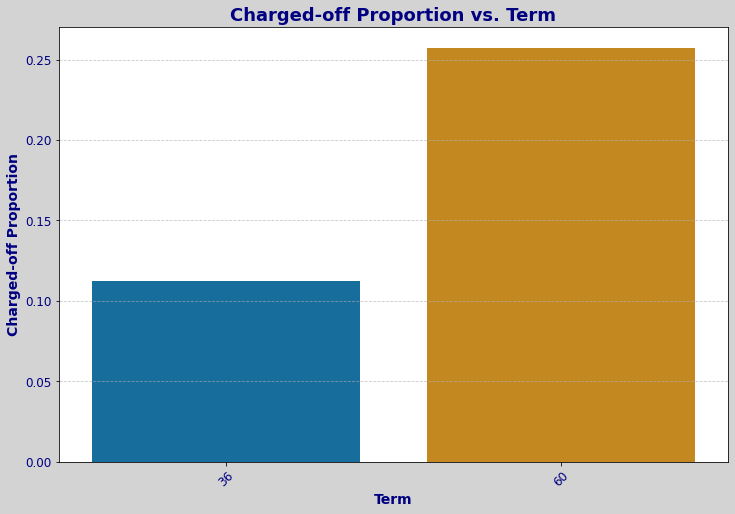

In [130]:
# using above function Plotting bar plot to visualize the relationship between Term /
# and the proportion of charged-off instances
plot_barplot(term_vs_loan, 'term', 'colorblind', 'Term', 'Term')

>  **Observations:**
  - For the loan term, loans with a term of 60 months (5 years) have a higher proportion of charged-off instances compared to loans with a term of 36 months (3 years). Specifically, the charged-off proportion for loans with a 60-month term is approximately 25.7%, whereas for loans with a 36-month term, it is approximately 11.2%.
  - The univariate analysis indicated that loans with a 36-month term were more likely to be charged off. However, the bivariate analysis reveals that while the count of charged-off loans is higher for the 36-month term, the proportion of charged-off loans is significantly higher for the 60-month term.
  
> **Univariate observation vs Bivariate observation** - 
 - This suggests that although loans with a 36-month term may have a higher count of charged-off instances, loans with a longer term of 60 months exhibit a higher proportion of charged-off instances relative to the total number of loans in that term category.

#### Bivariate Analysis on inquiries in past 6 months against Chargedoff_Proportion

In [131]:
inq_last_6mths_vs_loan = loan_data.groupby(['inq_last_6mths', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inq_last_6mths_vs_loan['Total'] = inq_last_6mths_vs_loan['Charged Off']+ inq_last_6mths_vs_loan['Fully Paid']
inq_last_6mths_vs_loan['Chargedoff_Proportion'] = inq_last_6mths_vs_loan['Charged Off'] / inq_last_6mths_vs_loan['Total']
inq_last_6mths_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,inq_last_6mths,Charged Off,Fully Paid,Total,Chargedoff_Proportion
7,7,10,22,32,0.312500
8,8,3,8,11,0.272727
6,6,15,43,58,0.258621
3,3,593,2209,2802,0.211635
5,5,26,108,134,0.194030
4,4,51,241,292,0.174658
2,2,912,4453,5365,0.169991
1,1,1618,8568,10186,0.158845
0,0,2203,15732,17935,0.122832


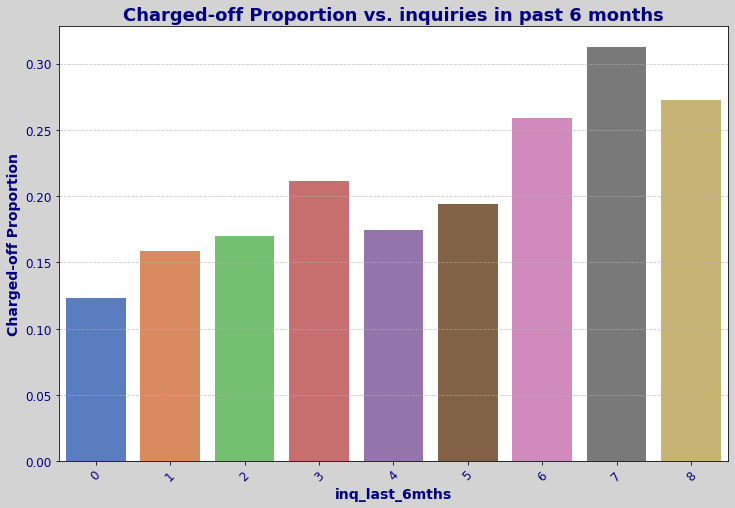

In [132]:
# using above function Plotting bar plot to visualize the relationship between inq_last_6mths_vs_loan /
# and the proportion of charged-off instances
plot_barplot(inq_last_6mths_vs_loan, 'inq_last_6mths', 'muted', 'inquiries in past 6 months', 'inq_last_6mths')

>  **Observations:**
  - In the univariate analysis, it was observed that loans with 0 inquiries in the last 6 months had a higher count of charged-off instances compared to loans with higher numbers of inquiries. This indicated that loans with no recent inquiries were more likely to be charged off.
  - However, in the bivariate analysis, the proportion of charged-off instances relative to the total number of loans in each category of inquiries in the last 6 months provides a different perspective. While loans with 0 inquiries still have a relatively high count of charged-off instances, the proportion of charged-off instances to the total number of loans in that category is lower compared to some other categories.

#### Bivariate Analysis on Installment against Chargedoff_Proportion

In [133]:
installment_range_vs_loan = loan_data.groupby(['installment_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
installment_range_vs_loan['Total'] = installment_range_vs_loan['Charged Off']+ installment_range_vs_loan['Fully Paid']
installment_range_vs_loan['Chargedoff_Proportion'] = installment_range_vs_loan['Charged Off'] / installment_range_vs_loan['Total']
installment_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,installment_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
7,918-1047,43,124,167,0.257485
9,1176-1305,9,33,42,0.214286
6,789-918,187,817,1004,0.186255
4,531-660,396,1898,2294,0.172624
5,660-789,210,1061,1271,0.165224
3,403-531,748,3957,4705,0.158980
0,14-145,1068,6230,7298,0.146341
2,274-403,1263,7371,8634,0.146282
1,145-274,1498,9804,11302,0.132543
8,1047-1176,9,89,98,0.091837


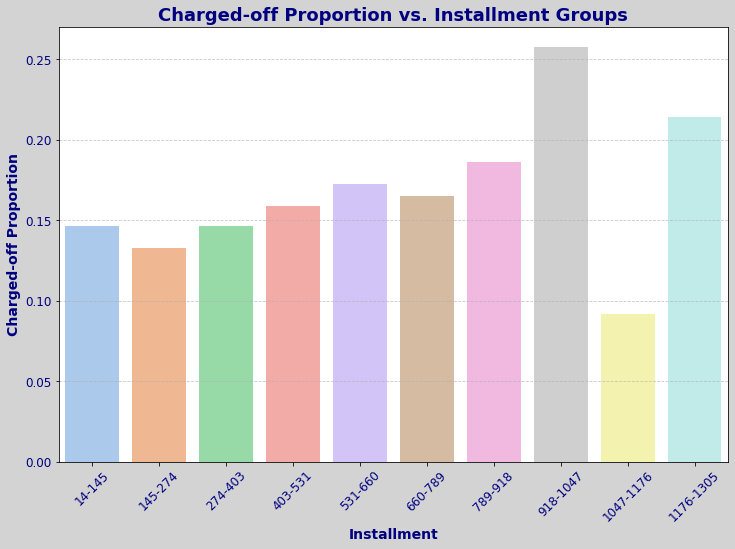

In [134]:
# using above function Plotting bar plot to visualize the relationship between installment /
# and the proportion of charged-off instances
plot_barplot(installment_range_vs_loan, 'installment_groups', 'pastel', 'Installment Groups', 'Installment')

>  **Observations:**
  - In the univariate analysis, it was observed that loans with installment amounts falling within the range of 145-274 had a higher count of charged-off instances compared to other installment amount ranges. This suggests that loans with installment amounts in this range were more likely to be charged off based on count alone.
  - However, when considering the proportion of charged-off instances relative to the total number of loans in each installment amount range, a different picture emerges. While loans with installment amounts in the range of 145-274 still have a relatively high count of charged-off instances, the proportion of charged-off instances to the total number of loans in that category is lower compared to some other ranges.
  - For instance, loans with installment amounts in the range of 918-1047 have the highest proportion of charged-off instances, with approximately 25.75% of loans in that category being charged off. This indicates that while loans with installment amounts in the range of 145-274 may have a higher count of charged-off instances, the proportion of charged-off instances relative to the total number of loans in that category is lower compared to categories with higher installment amounts.

#### Bivariate Analysis on amount committed by investors for that loan against Chargedoff_Proportion -

In [135]:
funded_amnt_inv_range_vs_loan = loan_data.groupby(['funded_amnt_inv_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
funded_amnt_inv_range_vs_loan['Total'] = funded_amnt_inv_range_vs_loan['Charged Off']+ funded_amnt_inv_range_vs_loan['Fully Paid']
funded_amnt_inv_range_vs_loan['Chargedoff_Proportion'] = funded_amnt_inv_range_vs_loan['Charged Off'] / funded_amnt_inv_range_vs_loan['Total']
funded_amnt_inv_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,funded_amnt_inv_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,30k-35k,116,305,421,0.275534
4,20k-25k,371,1607,1978,0.187563
3,15k-20k,680,3026,3706,0.183486
5,25k-30k,95,430,525,0.180952
0,0-5k,1554,8956,10510,0.147859
2,10k-15k,1022,6250,7272,0.140539
1,5k-10k,1593,10810,12403,0.128437


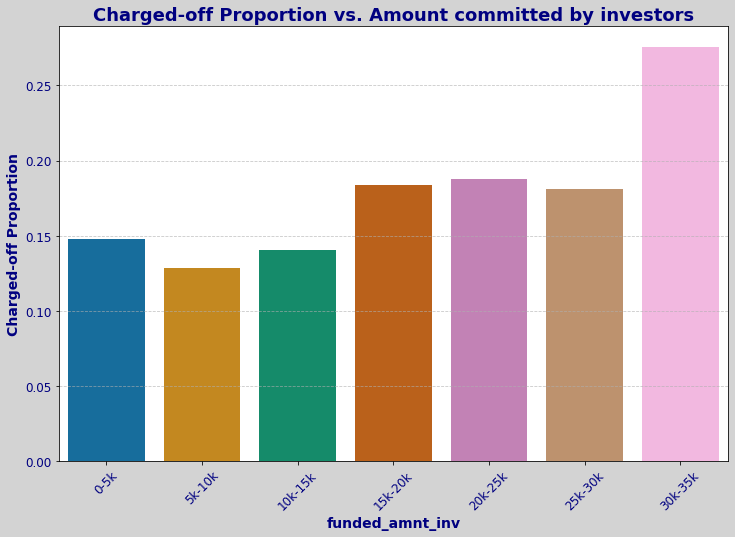

In [136]:
# using above function Plotting bar plot to visualize the relationship between amount committed by investors for that loan /
# and the proportion of charged-off instances
plot_barplot(funded_amnt_inv_range_vs_loan, 'funded_amnt_inv_groups', 'colorblind', 'Amount committed by investors', 'funded_amnt_inv')

>  **Observations:**
  - In the univariate analysis, it was observed that loans with funded amounts falling within the range of 0-5k had a higher count of charged-off instances compared to other funded amount ranges. This suggests that loans with lower funded amounts were more likely to be charged off based on count alone.
  - However, when considering the proportion of charged-off instances relative to the total number of loans in each funded amount range, a different picture emerges. While loans with funded amounts in the range of 0-5k still have a relatively high count of charged-off instances, the proportion of charged-off instances to the total number of loans in that category is lower compared to some other ranges.
  - For instance, loans with funded amounts in the range of 30k-35k have the highest proportion of charged-off instances, with approximately 27.55% of loans in that category being charged off. This indicates that while loans with funded amounts in the range of 0-5k may have a higher count of charged-off instances, the proportion of charged-off instances relative to the total number of loans in that category is lower compared to categories with higher funded amounts.

#### Bivariate Analysis on Debt to Income against Chargedoff_Proportion

In [137]:
dti_range_vs_loan = loan_data.groupby(['dti_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_range_vs_loan['Total'] = dti_range_vs_loan['Charged Off']+ dti_range_vs_loan['Fully Paid']
dti_range_vs_loan['Chargedoff_Proportion'] = dti_range_vs_loan['Charged Off'] / dti_range_vs_loan['Total']
dti_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_groups,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,18-24,1484,7266,8750,0.169600
4,24-30,263,1412,1675,0.157015
2,12-18,1663,9281,10944,0.151955
1,6-12,1296,8287,9583,0.135239
0,0-6,725,5138,5863,0.123657


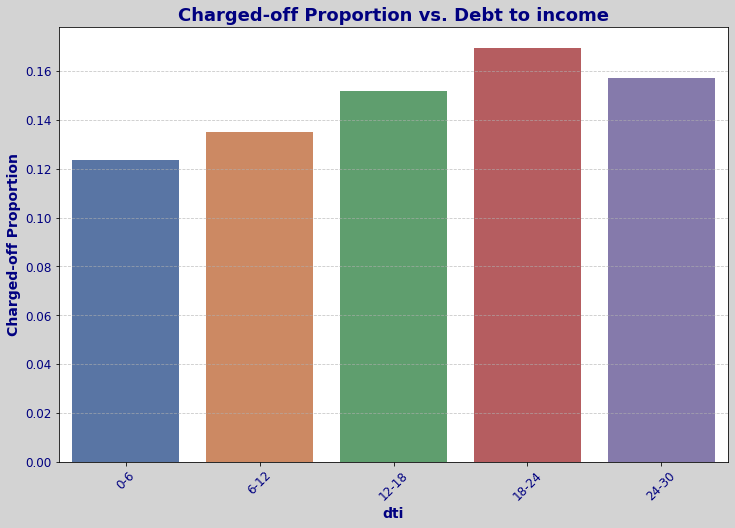

In [138]:
# using above function Plotting bar plot to visualize the relationship between Debt to income /
# and the proportion of charged-off instances
plot_barplot(dti_range_vs_loan, 'dti_groups', 'deep', 'Debt to income', 'dti')

>  **Observations:**
  - Higher DTI Ratios Associated with Higher Charged-off Proportions: Loans with higher DTI ratios tend to have higher proportions of charged-off instances. For instance, loans falling within the DTI range of 18-24 exhibit the highest proportion of charged-off instances, with approximately 16.96% of loans in that category being charged off. This suggests that borrowers with higher DTI ratios may face increased risk of defaulting on their loans.
  - Lower DTI Ratios Still Exhibit Charged-off Instances: While loans with lower DTI ratios generally have lower proportions of charged-off instances compared to those with higher DTI ratios, they are not immune to defaults. Even within the DTI range of 0-6, which typically signifies lower debt burdens relative to income, there are still charged-off instances, albeit at a lower proportion compared to higher DTI ranges.
  - Overall, the data indicates a correlation between DTI ratios and loan default rates, with higher DTI ratios generally associated with higher proportions of charged-off instances.

#### Bivariate Analysis on State against Chargedoff_Proportion

In [139]:
addr_state_vs_loan = loan_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,103.0,357.0,460.0,0.223913
40,SD,12.0,50.0,62.0,0.193548
0,AK,13.0,58.0,71.0,0.183099
9,FL,487.0,2180.0,2667.0,0.182602
11,HI,28.0,132.0,160.0,0.175000
24,MO,111.0,541.0,652.0,0.170245
31,NM,30.0,148.0,178.0,0.168539
13,ID,1.0,5.0,6.0,0.166667
36,OR,70.0,358.0,428.0,0.163551


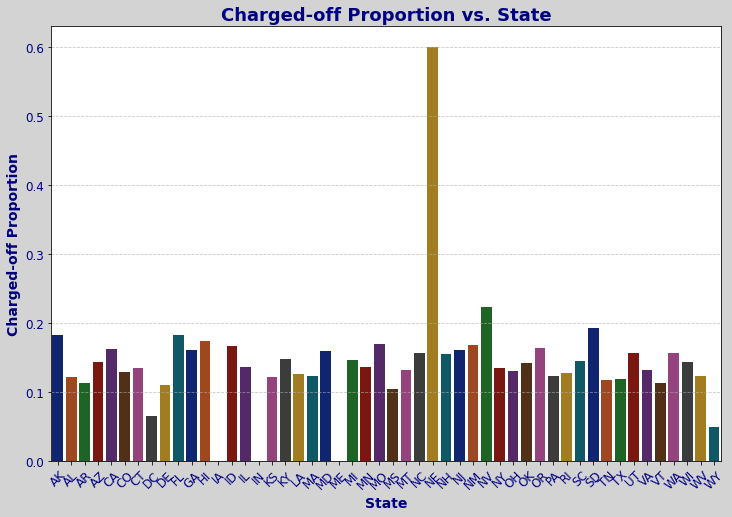

In [140]:
# using above function Plotting bar plot to visualize the relationship between State /
# and the proportion of charged-off instances
plot_barplot(addr_state_vs_loan, 'addr_state', 'dark', 'State', 'State')

>  **Observations:**
  - Varying Charged-off Proportions Across States: The proportion of charged-off loans varies significantly across different states. For instance, states like Nebraska (NE), Nevada (NV), and South Dakota (SD) exhibit relatively higher charged-off proportions, with approximately 60%, 22%, and 19.35% of loans in these states being charged off, respectively.
   - High Charged-off Proportions in Certain States: States such as Florida (FL), California (CA), and Georgia (GA) also show relatively high proportions of charged-off loans, with approximately 18.26%, 16.35%, and 16.17% respectively.
   - Regional Variances: These observations suggest that regional economic conditions, borrower demographics, and local lending practices may influence the likelihood of loan default. States with higher charged-off proportions may warrant closer scrutiny in terms of risk assessment and lending practices to mitigate default risks.
   
>   **Univariate vs Bivariate observation**
   - The univariate analysis, specifically examining loan defaults by state, identified California (CA) as having the highest count of defaulted loans. This finding suggests that, in terms of sheer numbers, California had the most instances of loan defaults compared to other states in the dataset. However, when considering the charged-off proportion (i.e., the proportion of loans charged off relative to the total loans issued) as a measure of default risk, other states may have higher proportions of charged-off loans, indicating a greater risk of default per loan issued.

#### Bivariate Analysis on Grade against Chargedoff_Proportion

In [141]:
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,96,171,267,0.359551
5,F,291,599,890,0.326966
4,E,662,1798,2460,0.269106
3,D,1083,3773,4856,0.223023
2,C,1326,6180,7506,0.176659
1,B,1380,9772,11152,0.123745
0,A,593,9091,9684,0.061235


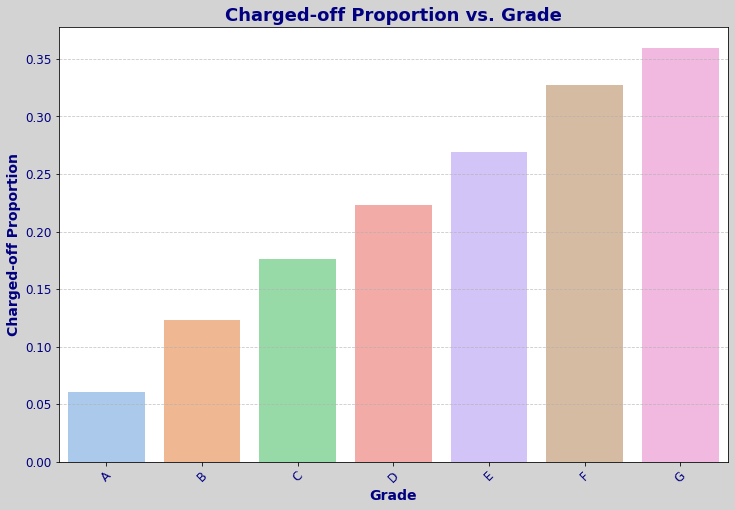

In [142]:
# using above function Plotting bar plot to visualize the relationship between Grade /
# and the proportion of charged-off instances
plot_barplot(grade_vs_loan, 'grade', 'pastel', 'Grade', 'Grade')

>  **Observations:**
  - In the bivariate analysis of loan defaults by grade, it's evident that the proportion of charged-off loans increases with lower grades. Grade G has the highest proportion of charged-off loans at approximately 35.96%, followed by Grade F with around 32.70%, and Grade E with approximately 26.91%. As the grades improve, the proportion of charged-off loans decreases, with Grade A having the lowest proportion at around 6.12%. This trend suggests that lower-grade loans are associated with a higher risk of default compared to higher-grade loans.
  
>  **Univariate vs Bivariate observation**
  - The discrepancy between the univariate and bivariate analyses regarding the grade with the highest proportion of charged-off loans. While the univariate analysis pointed towards Grade B as having the highest count of charged-off loans, the bivariate analysis indicates that Grade B actually has a lower proportion of charged-off loans compared to Grades C, D, E, F, and G. This suggests that while Grade B loans may have a higher count of defaults, when considering the proportion relative to the total number of loans in each grade, the risk of default is lower compared to lower-grade loans

#### Bivariate Analysis on Purpose against Chargedoff_Proportion 

In [143]:
purpose_vs_loan = loan_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454,1175,1629,0.278699
10,renewable_energy,18,77,95,0.189474
3,educational,54,259,313,0.172524
8,moving,90,460,550,0.163636
9,other,607,3105,3712,0.163524
5,house,55,283,338,0.162722
7,medical,104,538,642,0.161994
2,debt_consolidation,2684,14694,17378,0.154448
12,vacation,52,313,365,0.142466
4,home_improvement,322,2262,2584,0.124613


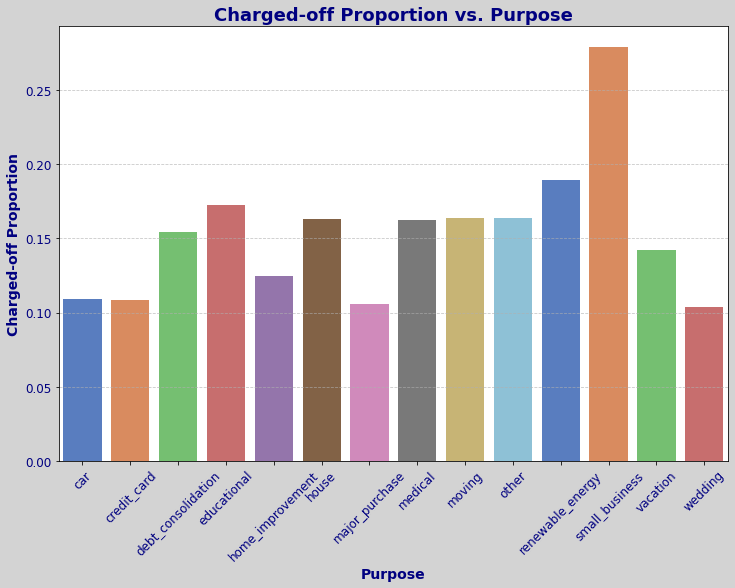

In [144]:
# using above function Plotting bar plot to visualize the relationship between Purpose /
# and the proportion of charged-off instances
plot_barplot(purpose_vs_loan, 'purpose', 'muted', 'Purpose', 'Purpose')

>  **Observations:**
  - Small business loans have the highest charged-off proportion at around 27.87%, indicating higher risk.
  - Renewable energy loans follow, with a charged-off proportion of about 18.95%.
  
> **Univariate vs Bivariate observation**
  - The univariate analysis indicated that debt consolidation loans had the highest count of charged-off instances. However, when considering the charged-off proportion, which reflects the proportion of charged-off loans relative to the total loans for each category, other purposes such as small business, renewable energy, and educational loans exhibit higher risk compared to debt consolidation.

#### Bivariate Analysis of Home Ownership against Chargedoff_Proportion 


In [145]:
home_ownership_vs_loan = loan_data.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,17,79,96,0.177083
3,RENT,2774,15289,18063,0.153574
2,OWN,436,2426,2862,0.152341
0,MORTGAGE,2204,13590,15794,0.139547


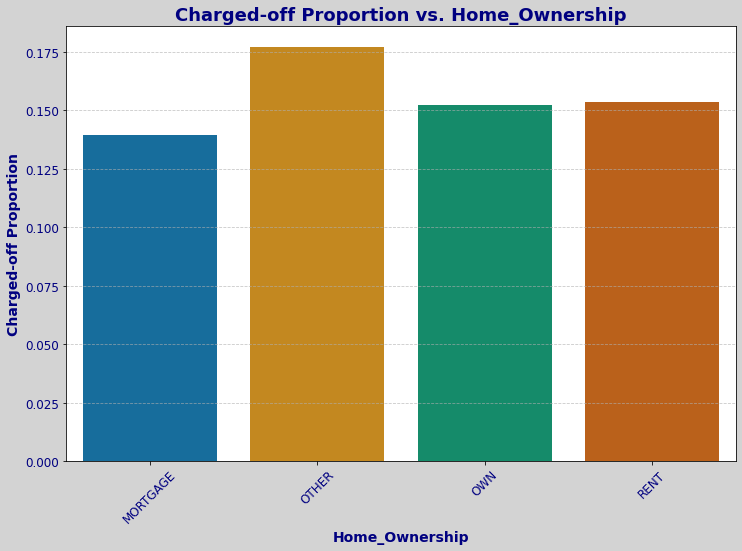

In [146]:
# using above function Plotting bar plot to visualize the relationship between home_ownership /
# and the proportion of charged-off instances
plot_barplot(home_ownership_vs_loan, 'home_ownership', 'colorblind', 'Home_Ownership', 'Home_Ownership')

>  **Observations:**
  - The analysis on home ownership status and loan status indicates that while renters have the highest count of charged-off loans, when considering the proportion of charged-off loans relative to the total loans in each category, 'Other' home ownership status exhibits the highest proportion of charged-off loans. This suggests that although renters have the highest count of charged-off loans, they do not have the highest proportion of charged-off loans when compared to other home ownership categories.

#### Bivariate Analysis on public record bankruptcies against Chargedoff_Proportion -

In [147]:
pub_rec_bankruptcies_vs_loan = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,361,1241,1602,0.225343
0,0.0,5068,30140,35208,0.143945


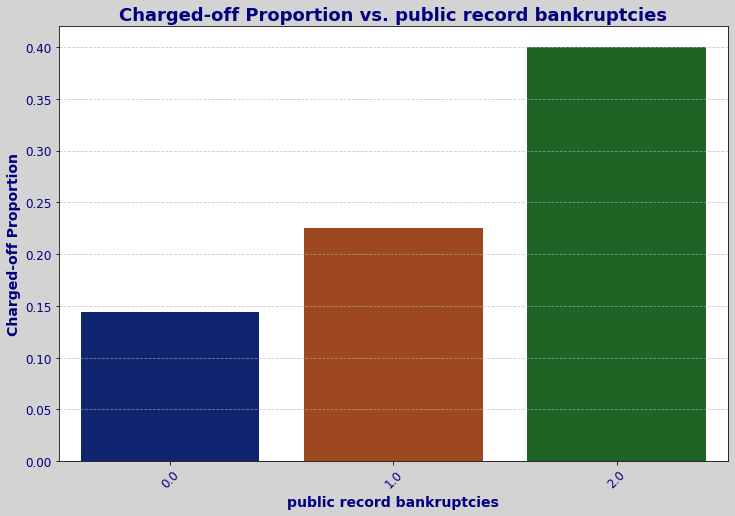

In [148]:
# using above function Plotting bar plot to visualize the relationship between public record bankruptcies /
# and the proportion of charged-off instances
plot_barplot(pub_rec_bankruptcies_vs_loan, 'pub_rec_bankruptcies', 'dark', 'public record bankruptcies', 'public record bankruptcies')

>  **Observations:**
  - The analysis on public record bankruptcies suggests that borrowers with two bankruptcies have the highest proportion of charged-off loans, followed by borrowers with one bankruptcy. Borrowers with no bankruptcies have the lowest proportion of charged-off loans. This indicates a correlation between the number of public record bankruptcies and the likelihood of loan default.

### 6. Correlation

> The below code snippet generates a **correlation heatmap** for numerical features in the loan dataset.It calculates the correlation matrix for these numerical features. Finally, it visualizes the correlation matrix using a heatmap, where each cell represents the correlation coefficient between two features. The heatmap is annotated with correlation values and uses a coolwarm color palette to indicate the strength and direction of correlations.

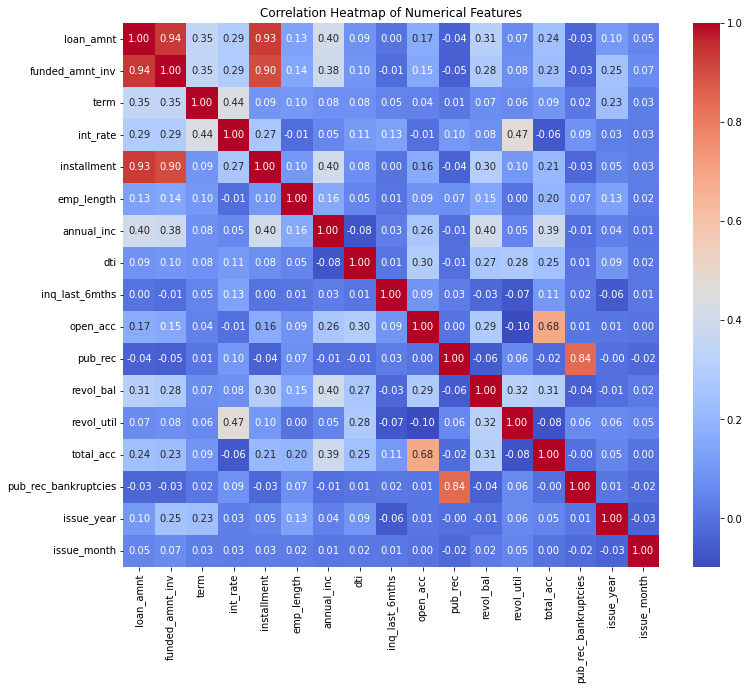

In [149]:
# Select numerical columns for correlation analysis
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).drop(columns=['sub_grade'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

> **Observations**:
 - Negative Correlation:
    - loan_amnt has negative correlation with pub_rec_bankrupticies
    - annual income has a negative correlation with dti

 - Strong Correlation:
    - term has a strong correlation with loan amount
    - term has a strong correlation with interest rate
    - annual income has a strong correlation with loan_amount

### Analysing annual income with other columns for more insights

#### 1.Annual income vs loan purpose

>The below code creates a bar plot to visualize the relationship between **annual income, purpose of the loan, and loan status**. Each bar represents a different purpose of the loan, and the height of the bar indicates the annual income. The hue parameter distinguishes between different loan statuses, with different colors representing 'Charged Off' and 'Fully Paid' loans.

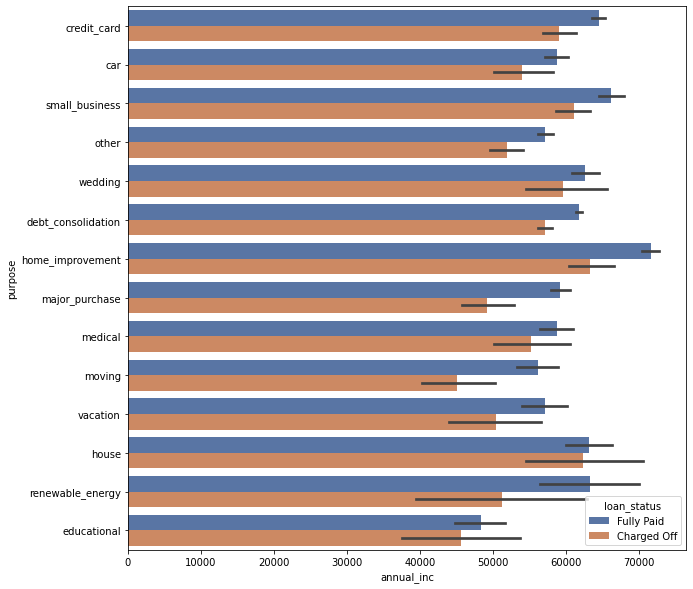

In [150]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

>**Observations**: 
 - Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy", "credit card" and "small_businesses".
   - More likely to Default-
      - Applicants taking loan for 'home improvement' and have income of 60k -70k*

#### 2.Annual income vs home ownership

> The below code creates a bar plot to visualize the relationship between **annual income, home ownership, and loan status**.

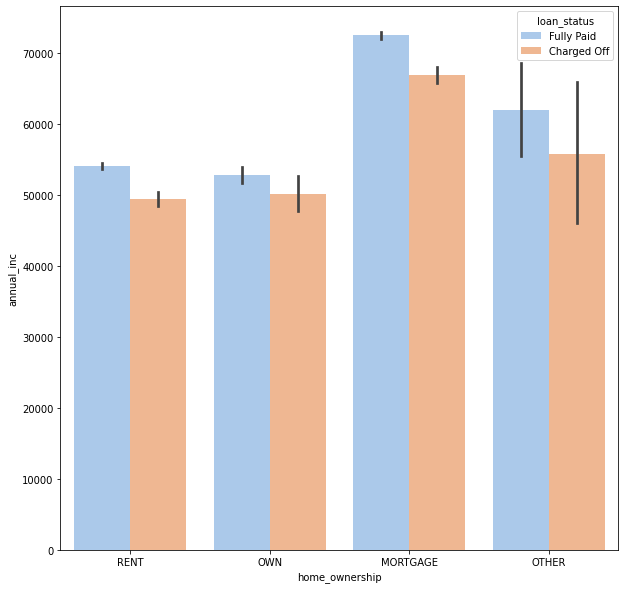

In [151]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

> **Observation**:
   - More likely to Default - Applicants whose home ownership is 'MORTGAGE and have income of 60-70k

#### 3.Annual Income vs Loan amount

>The below code creates a bar plot to visualize the relationship between **annual income, loan amount and loan status**.

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

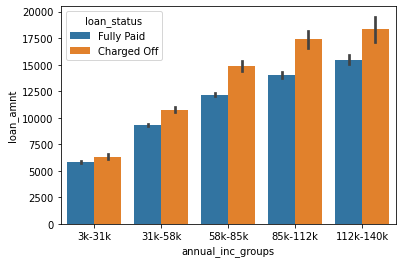

In [152]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

> **Observation**:
   - Across all the income groups, Higher the loan amount higher the Default cases

#### 4. Annual income vs int_rate

>The below code creates a bar plot to visualize the relationship between **annual income, Interest rate groups, and loan status**.

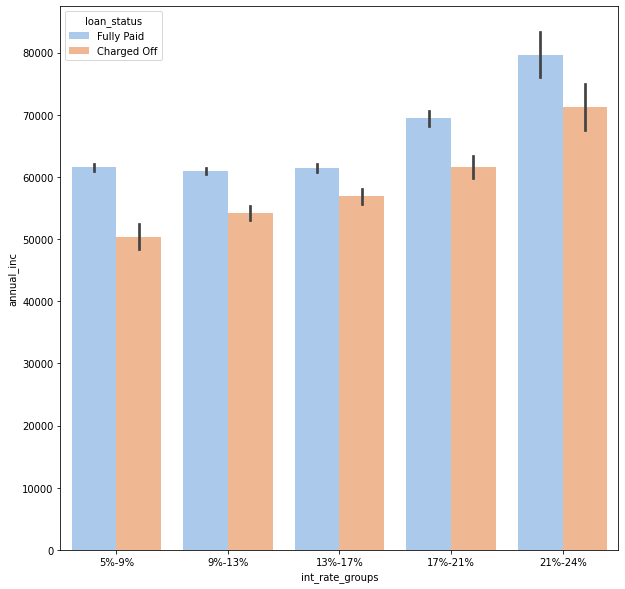

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

> **Observation**:
   - More likely to Default - Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k

### Analysing loan_amount with other columns for more insights

#### 1. Loan Amount vs Interest Rate

>The below code creates a bar plot to visualize the relationship between **loan amount groups, interest rates and loan status**. 

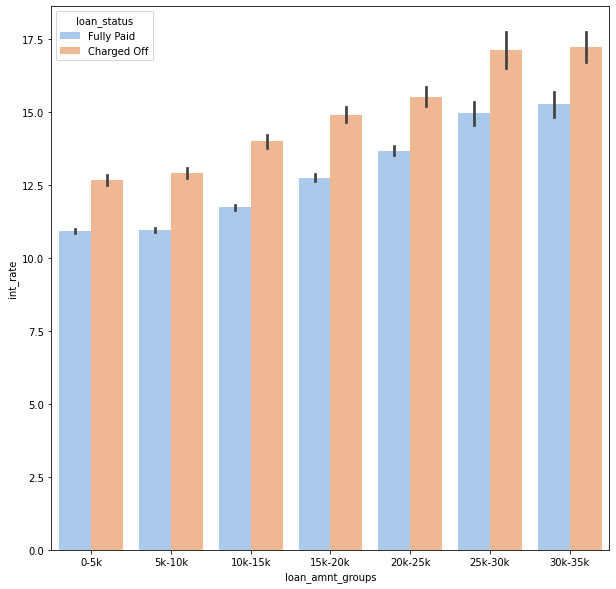

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

> **Observations**
   - More likely to Default
       - Applicants who have taken a loan in between 25k - 35k and are charged interest rate of 15-17.5 %

> The below code creates a bar plot to visualize the relationship between loan amount, purpose and loan status

#### 2. Loan vs Loan purpose

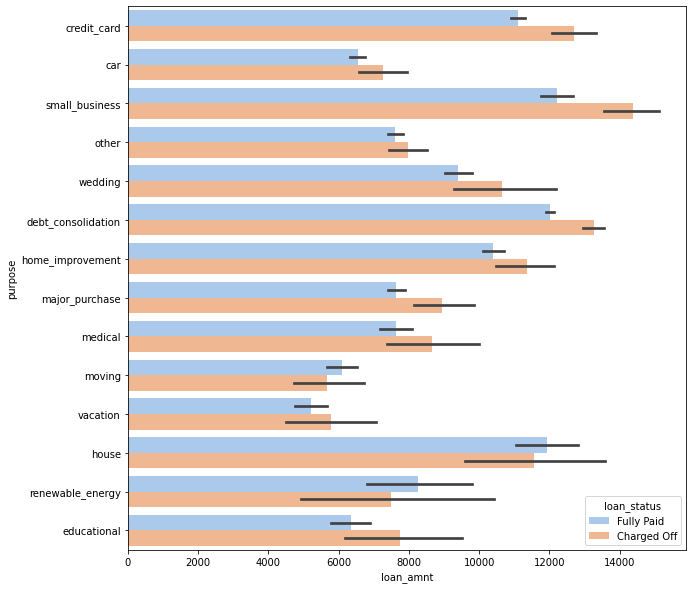

In [155]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

> **Observations**:
   - More likely to Default
      - Applicants who have taken a loan for small business and the loan amount is greater than 14k

####  3. Loan vs House Ownership

> The below code creates a bar plot to visualize the relationship between loan amount , Home ownerships and loan status

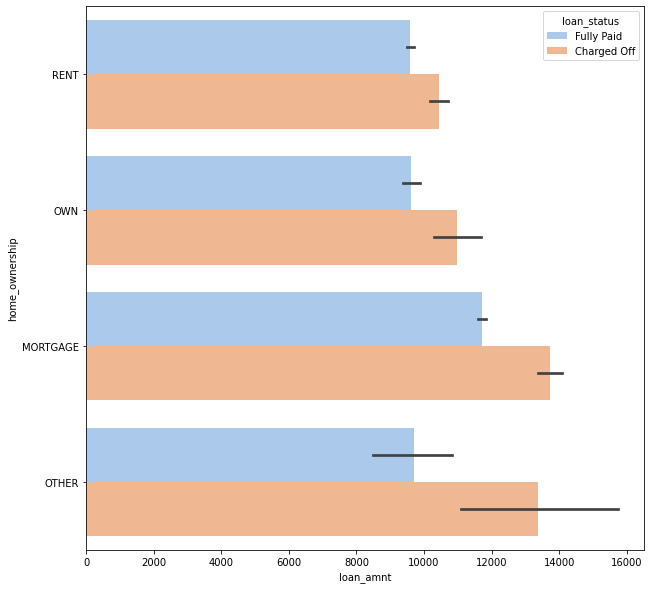

In [156]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

> **Observations**
   - More likely to Default
     - Applicants whose home ownership is 'MORTGAGE' and have loan of 14-16k

#### 4. Loan amount vs Grade

> The below code creates a bar plot to visualize the relationship between loan amount, Grade and loan status

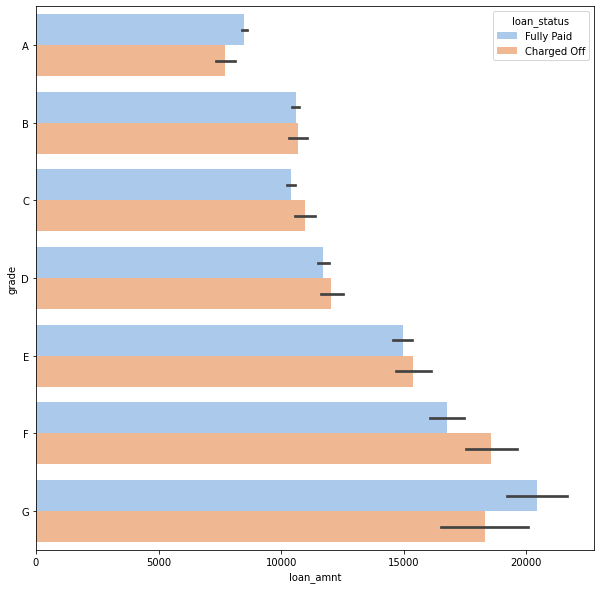

In [157]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

> **Observation**
   - More likely to Default
      - When grade is F/G and loan amount is between 15k-20k

#### 5. Loan amount vs Emp Length and Verification status

> This code creates two subplots, each displaying a bar plot. The first subplot shows the relationship between **loan amount and employment length, with loan status** distinguished by hue. The second subplot illustrates the association between **loan amount and verification status, also with loan status** differentiated by hue.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

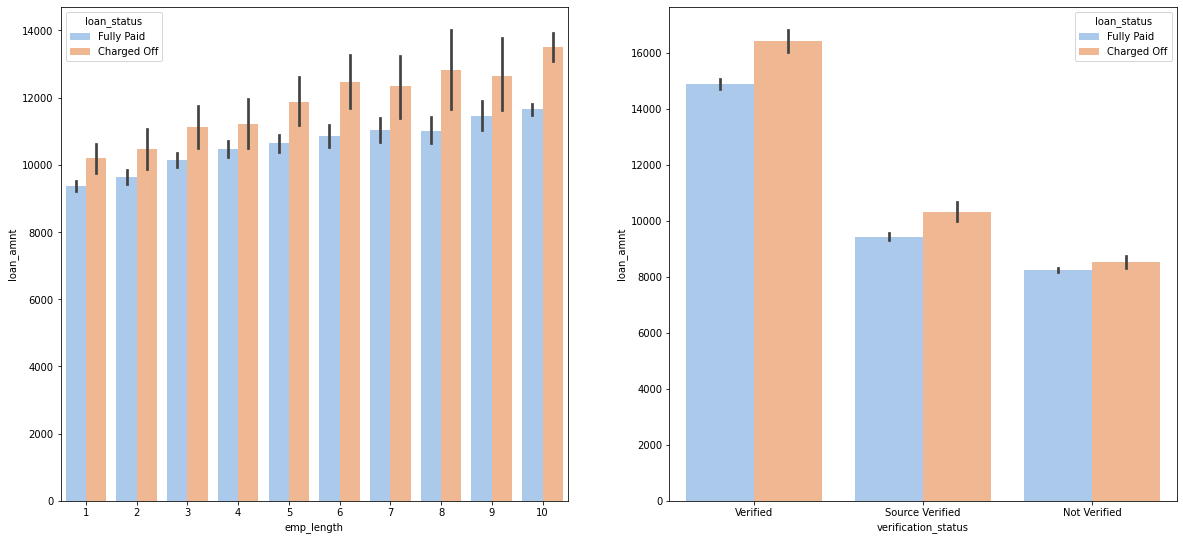

In [158]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

> **Observations** 
   - More likely to Default
      - When employment length is 10yrs and loan amount is 12k-14k
      - When the loan is verified and loan amount is above 16k.

*Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms should strictly verify the loans with higher values.*


> The below code uses seaborn's catplot function to create a categorical plot with **loan amount groups** on the x-axis and **interest rate** on the y-axis. The plot displays box plots, with the loan status distinguished by hue.

<Figure size 432x288 with 0 Axes>

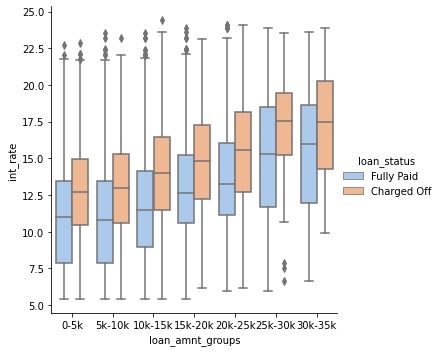

In [159]:
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

>**Observations**
   - The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
      - This can be a pretty strong driving factor for loan defaulting.

> This seaborn catplot generates a bar plot showing the relationship between **loan term (x-axis)** and **loan amount (y-axis)**. The bars are distinguished by **loan status**, with different colors indicating charged off or fully paid loans

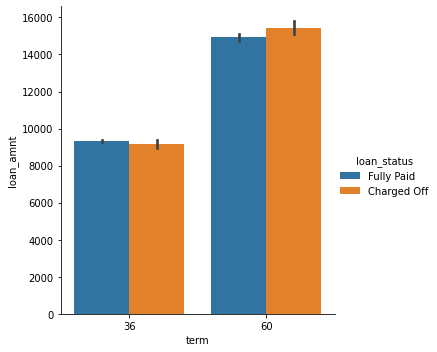

In [160]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

> **Observations**:
   - Applicants who Fully Paid and defaulted have no significant difference in loan_amounts.
        - also applicants applying for long term has applied for more loan.

<blockquote style="color: blue;"><strong><font size="5">Recommendations:</font></strong></blockquote>

> Based on the observations from the **univariate and bivariate analyses**, here are the recommendations for lenders:

 - **Interest Rate and Employment Length**: Lenders should exercise caution when offering loans to applicants with interest rates falling in the range of 13%-17% and an employment length of 10 years. These applicants demonstrate a higher probability of default.
- **Grade and Sub-Grade**: Loans classified under Grade B and Sub-Grade B5 should be scrutinized more closely, as they exhibit a higher likelihood of default compared to other grades and sub-grades.
 - **Home Ownership**: Applicants who rent their homes are more likely to default on loans. Lenders should consider additional risk factors when assessing loan applications from renters.
 - **Loan Purpose**: Loans intended for debt consolidation pose a higher risk of default. Lenders should evaluate the financial stability and repayment capacity of applicants seeking debt consolidation loans more thoroughly.
 - **Geographical Considerations**: Although California has the highest count of defaulted loans, lenders should also pay attention to states with higher proportions of charged-off loans, such as Nebraska, Nevada, and South Dakota. Regional economic conditions and borrower demographics can impact default rates.
 - **Revolving Line Utilization Rate and Revolving Balance**: Borrowers with high revolving line utilization rates (60-80%) and significant revolving balances (3566-8522, 16213-50000) are more likely to default. Lenders should assess these factors when evaluating loan applications.
 - **Total Account and Total Credit Lines**: Borrowers with fewer credit lines (2-20) are associated with higher default rates. Lenders should consider the borrower's credit history and credit utilization when assessing risk.
 - **Loan Term**: Loans with longer terms (60 months) have a higher proportion of defaults compared to shorter-term loans (36 months). Lenders should evaluate the borrower's ability to repay over the entire loan term.
 - **Verification Status and Inquiries**: Loans with "Not Verified" status and fewer inquiries in the past 6 months are associated with higher default rates. Lenders should verify applicant information rigorously and consider recent credit activity.
 - **Derogatory Public Records and Installment Amount**: Borrowers with derogatory public records and higher monthly installments (145-274) are more likely to default. Lenders should assess these risk factors when evaluating loan applications.
 - **Debt-to-Income (DTI) Ratio and Funded Amount**: Higher DTI ratios (12-18) and funded amounts (5k-10k) are associated with higher default rates. Lenders should consider the borrower's debt burden and loan amount when assessing risk.
 - **Loan Issuance Date**: Loans issued in December and in the year 2011 show higher default rates. Lenders should consider seasonal and temporal factors when evaluating loan performance.
 - **Income Range and Purpose**: Applicants with lower income ranges (3k-31k) and small business loans demonstrate higher default rates. Lenders should assess income stability and the viability of business ventures.
 - **Negative Correlation**: Negative correlations between loan amount and public record bankruptcies, as well as between annual income and DTI, indicate potential risk factors. Lenders should analyze these correlations to identify potential red flags in loan applications.
 - **Strong Correlation**: Strong correlations between loan term and loan amount, as well as between term and interest rate, highlight interdependencies that may impact default rates. Lenders should consider these factors when structuring loan terms and rates.

>By integrating these insights into their risk assessment processes, lenders can make more informed decisions, mitigate default risks, and optimize their loan portfolios for better performance and profitability.
